# **Project Name :** EDA on Fed-Ex
## **Type :** Individual
## **Member Name :** K. Abhinay

# Project Summary

**Problem Statement**
FedEx Logistics operates a global supply chain involving multiple shipment methods, vendor contracts, and delivery requirements. With the rise of global eCommerce, the company faces:

    * Shipment delays

    *  High freight costs

    * Inefficiencies in purchase order management

These factors risk increased customer dissatisfaction and operational costs without a data-driven logistics strategy.

**Business Objective**

To perform an exploratory data analysis (EDA) that helps:

    * Identify patterns behind delays and costs

    * Evaluate vendor performance and INCO term effectiveness

**Recommend actionable insights for:**

    * Reducing logistics costs

    * Improving delivery timelines

    * Enhancing customer satisfaction

## Problem Statement

FedEx Logistics operates a complex global supply chain involving diverse shipment methods, international vendor agreements, and product-specific delivery requirements. As global eCommerce demand increases, challenges such as shipment delays, high freight costs, and inefficiencies in purchase order management threaten the company’s ability to meet delivery expectations and maintain cost-effective operations. Without optimized logistics strategies and data-driven insights, these inefficiencies can lead to decreased customer satisfaction and increased operational expenses.

## Business Objective

The primary objective is to analyze logistics data to identify inefficiencies and optimize supply chain operations. This includes:

* Identifying patterns that lead to shipment delays or increased freight costs.

* Evaluating vendor performance and INCO term effectiveness.

* Recommending actionable insights to reduce logistics costs, improve delivery timelines, and enhance customer satisfaction.

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load Dataset
df=pd.read_csv("SCMS_Delivery_History_Dataset.csv")

In [3]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [4]:
df.shape

(10324, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [6]:
df.duplicated().sum()

0

### Feature Selection

In [7]:
col=["ASN/DN #",'Country','Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date','Product Group', 'Sub Classification','Vendor','Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)']

df=df[col]
df.head()

,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [8]:
df.shape

(10324, 24)

In [9]:
# Check Unique Values for each variable.
for i in df.columns:
    print(f'{i} : {df[i].nunique()}')

ASN/DN # : 7030
Country : 43
Managed By : 4
Fulfill Via : 2
Vendor INCO Term : 8
Shipment Mode : 4
PQ First Sent to Client Date : 765
PO Sent to Vendor Date : 897
Scheduled Delivery Date : 2006
Delivered to Client Date : 2093
Delivery Recorded Date : 2042
Product Group : 5
Sub Classification : 6
Vendor : 73
Unit of Measure (Per Pack) : 31
Line Item Quantity : 5065
Line Item Value : 8741
Pack Price : 1175
Unit Price : 183
Manufacturing Site : 88
First Line Designation : 2
Weight (Kilograms) : 4688
Freight Cost (USD) : 6733
Line Item Insurance (USD) : 6722


In [10]:
for i in df.columns:
    print(f'{i} : {df[i].unique()}')

ASN/DN # : ['ASN-8' 'ASN-85' 'ASN-14' ... 'DN-4276' 'DN-4279' 'DN-4334']
Country : ["Côte d'Ivoire" 'Vietnam' 'Nigeria' 'Zambia' 'Tanzania' 'Rwanda' 'Haiti'
 'Zimbabwe' 'Ethiopia' 'South Africa' 'Guyana' 'Namibia' 'Botswana'
 'Mozambique' 'Kenya' 'Kazakhstan' 'Uganda' 'Kyrgyzstan' 'Senegal' 'Benin'
 'Lesotho' 'Pakistan' 'Swaziland' 'Ghana' 'Angola' 'Lebanon'
 'Sierra Leone' 'Cameroon' 'South Sudan' 'Burundi' 'Dominican Republic'
 'Malawi' 'Congo, DRC' 'Sudan' 'Mali' 'Guatemala' 'Togo' 'Afghanistan'
 'Liberia' 'Burkina Faso' 'Guinea' 'Libya' 'Belize']
Managed By : ['PMO - US' 'South Africa Field Office' 'Haiti Field Office'
 'Ethiopia Field Office']
Fulfill Via : ['Direct Drop' 'From RDC']
Vendor INCO Term : ['EXW' 'FCA' 'DDU' 'CIP' 'DDP' 'CIF' 'N/A - From RDC' 'DAP']
Shipment Mode : ['Air' nan 'Truck' 'Air Charter' 'Ocean']
PQ First Sent to Client Date : ['Pre-PQ Process' 'Date Not Captured' '11/18/2009' '5/3/2013' '8/19/2014'
 '1/6/2012' '2/22/2013' '10/28/2014' '2/20/2013' '2/17/2012

### Data Cleaning

In [11]:
df[(df['PO Sent to Vendor Date']=="Date Not Captured")|(df['PO Sent to Vendor Date']=="N/A - From RDC")]

,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/2014,N/A - From RDC,31-Jul-15,15-Jul-15,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/2014,N/A - From RDC,31-Jul-15,6-Aug-15,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/2014,N/A - From RDC,31-Aug-15,25-Aug-15,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/2015,N/A - From RDC,9-Sep-15,4-Aug-15,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [12]:
df['PO Sent to Vendor Date']=np.where(df['PO Sent to Vendor Date']=="Date Not Captured", np.nan, df['PO Sent to Vendor Date'])
df['PO Sent to Vendor Date']=np.where(df['PO Sent to Vendor Date']=="N/A - From RDC","From RDC", df['PO Sent to Vendor Date'])
df['Vendor INCO Term']=np.where(df['Vendor INCO Term']=="N/A - From RDC","From RDC", df['Vendor INCO Term'])

In [13]:
df['PO Sent to Vendor Date']=pd.to_datetime(df['PO Sent to Vendor Date'], format='%m/%d/%Y', errors='coerce')
df['Scheduled Delivery Date']=pd.to_datetime(df['Scheduled Delivery Date'], format='%d-%b-%y', errors='coerce')
df['Delivered to Client Date']=pd.to_datetime(df['Delivered to Client Date'], format='%d-%b-%y', errors='coerce')
df['Delivery Recorded Date']=pd.to_datetime(df['Delivery Recorded Date'], format='%d-%b-%y', errors='coerce')
df['PQ First Sent to Client Date']=pd.to_datetime(df['PQ First Sent to Client Date'], format='%d-%b-%y', errors='coerce')

In [14]:
df[df['Weight (Kilograms)'].astype(str).str.startswith('See')]

,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
8,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,NaT,NaT,2006-12-07,2006-12-07,...,60,273,532.35,1.95,0.03,"Aurobindo Unit III, India",No,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),NaN
86,ASN-3562,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,2009-01-16,2009-04-10,2009-04-10,...,60,21000,50400.00,2.40,0.04,"Aurobindo Unit III, India",No,See ASN-3562 (ID#:960),See ASN-3562 (ID#:960),98.78
94,ASN-3675,Haiti,PMO - US,Direct Drop,CIP,Air,NaT,2009-03-06,2009-03-31,2009-03-31,...,200,32,402.88,12.59,0.06,"BMS Meymac, France",No,See ASN-3675 (ID#:1046),See ASN-3675 (ID#:1046),0.79
140,ASN-242,Rwanda,PMO - US,Direct Drop,EXW,Air,NaT,2006-12-22,2007-02-27,2007-02-27,...,30,71577,1087970.40,15.20,0.51,"Cipla, Goa, India",No,See ASN-242 (ID#:64),See ASN-242 (ID#:64),NaN
141,ASN-242,Rwanda,PMO - US,Direct Drop,EXW,Air,NaT,2006-12-22,2007-02-27,2007-02-27,...,60,5605,202340.50,36.10,0.60,"Cipla, Patalganga, India",No,See ASN-242 (ID#:64),See ASN-242 (ID#:64),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10314,DN-4274,Nigeria,PMO - US,From RDC,From RDC,Air Charter,NaT,NaT,2015-06-30,2015-05-15,...,60,10340,37224.00,3.60,0.06,Mylan (formerly Matrix) Nashik,No,See DN-4274 (ID#:84472),See DN-4274 (ID#:84472),38.27
10317,DN-4282,Nigeria,PMO - US,From RDC,From RDC,Air,NaT,NaT,2015-06-30,2015-06-22,...,30,6724,20978.88,3.12,0.10,"Strides, Bangalore, India.",No,See DN-4282 (ID#:83919),See DN-4282 (ID#:83919),24.69
10318,DN-4307,Zimbabwe,PMO - US,From RDC,From RDC,Truck,NaT,NaT,2015-07-31,2015-07-15,...,60,205243,738874.80,3.60,0.06,"Cipla, Goa, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),869.66
10319,DN-4307,Zimbabwe,PMO - US,From RDC,From RDC,Truck,NaT,NaT,2015-07-31,2015-07-15,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79


In [15]:
df[(df['Freight Cost (USD)']=="Freight Included in Commodity Cost")|(df['Freight Cost (USD)']=="Invoiced Separately")]

,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
6,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,NaT,NaT,2007-01-08,2007-01-08,...,90,135,4374.00,32.40,0.36,MSD South Granville Australia,Yes,328,Freight Included in Commodity Cost,NaN
9,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,NaT,2006-11-13,2007-01-30,2007-01-30,...,120,2800,115080.00,41.10,0.34,ABBVIE (Abbott) St. P'burg USA,Yes,643,Freight Included in Commodity Cost,NaN
10,ASN-223,Zambia,PMO - US,Direct Drop,CIP,Air,NaT,2006-12-01,2007-02-16,2007-02-16,...,120,2800,115080.00,41.10,0.34,ABBVIE Ludwigshafen Germany,Yes,643,Freight Included in Commodity Cost,NaN
12,ASN-144,Nigeria,PMO - US,Direct Drop,EXW,Air,NaT,NaT,2007-01-10,2007-01-10,...,100,10,850.00,85.00,0.85,"EY Laboratories, USA",Yes,Weight Captured Separately,Invoiced Separately,NaN
15,ASN-285,Zimbabwe,PMO - US,Direct Drop,CIP,Air,NaT,2007-01-10,2007-03-19,2007-03-19,...,60,579,14764.50,25.50,0.42,"BMS Meymac, France",Yes,Weight Captured Separately,Freight Included in Commodity Cost,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,DN-3325,Dominican Republic,PMO - US,From RDC,From RDC,Air,NaT,NaT,2013-09-26,2013-05-21,...,120,93,0.00,0.00,0.00,Mylan (formerly Matrix) Nashik,Yes,Weight Captured Separately,Invoiced Separately,0.00
10300,DN-4215,Uganda,PMO - US,From RDC,From RDC,Truck,NaT,NaT,2015-04-30,2015-04-22,...,60,21667,167269.24,7.72,0.13,Mylan (formerly Matrix) Nashik,No,Weight Captured Separately,Freight Included in Commodity Cost,196.88
10321,DN-4316,Zambia,PMO - US,From RDC,From RDC,Truck,NaT,NaT,2015-08-31,2015-08-25,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,DN-4334,Zimbabwe,PMO - US,From RDC,From RDC,Truck,NaT,NaT,2015-09-09,2015-08-04,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [16]:
df['Freight Cost (USD)']=np.where((df['Freight Cost (USD)']=="Freight Included in Commodity Cost")|(df['Freight Cost (USD)']=="Invoiced Separately"),0, df['Freight Cost (USD)'])

In [17]:
df[df['Weight (Kilograms)']=='Weight Captured Separately']

,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
12,ASN-144,Nigeria,PMO - US,Direct Drop,EXW,Air,NaT,NaT,2007-01-10,2007-01-10,...,100,10,850.00,85.00,0.85,"EY Laboratories, USA",Yes,Weight Captured Separately,0,NaN
15,ASN-285,Zimbabwe,PMO - US,Direct Drop,CIP,Air,NaT,2007-01-10,2007-03-19,2007-03-19,...,60,579,14764.50,25.50,0.42,"BMS Meymac, France",Yes,Weight Captured Separately,0,NaN
16,ASN-608,Nigeria,PMO - US,Direct Drop,CIP,NaN,NaT,NaT,2007-05-07,2007-05-07,...,100,1500,120000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,Weight Captured Separately,0,192.00
31,ASN-1251,South Africa,PMO - US,Direct Drop,DDP,NaN,NaT,2007-11-12,2008-01-29,2008-01-29,...,200,40,317.60,7.94,0.04,GSK Mississauga (Canada),Yes,Weight Captured Separately,0,0.51
35,ASN-1269,Nigeria,PMO - US,Direct Drop,EXW,Air,NaT,NaT,2008-02-05,2008-02-05,...,100,650,6.50,0.01,0.00,Inverness Japan,Yes,Weight Captured Separately,0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10182,DN-3283,Burundi,PMO - US,From RDC,From RDC,Air,NaT,NaT,2013-10-13,2013-05-21,...,60,63,142.38,2.26,0.04,Hetero Unit III Hyderabad IN,Yes,Weight Captured Separately,0,0.18
10190,DN-3325,Dominican Republic,PMO - US,From RDC,From RDC,Air,NaT,NaT,2013-09-26,2013-05-21,...,120,93,0.00,0.00,0.00,Mylan (formerly Matrix) Nashik,Yes,Weight Captured Separately,0,0.00
10300,DN-4215,Uganda,PMO - US,From RDC,From RDC,Truck,NaT,NaT,2015-04-30,2015-04-22,...,60,21667,167269.24,7.72,0.13,Mylan (formerly Matrix) Nashik,No,Weight Captured Separately,0,196.88
10321,DN-4316,Zambia,PMO - US,From RDC,From RDC,Truck,NaT,NaT,2015-08-31,2015-08-25,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,0,5284.04


In [18]:
df=df[df['Weight (Kilograms)']!='Weight Captured Separately']

In [19]:
# Extract DN/ASN codes like 'DN-4307' or 'ASN-93'
df['Freight Ref Code'] = df['Freight Cost (USD)'].str.extract(r'See\s+(DN-\d+|ASN-\d+)', expand=False)
df['Weight Ref Code'] = df['Weight (Kilograms)'].astype(str).str.extract(r'See\s+(DN-\d+|ASN-\d+)', expand=False)


In [20]:
df[df['Weight (Kilograms)'].astype(str).str.startswith('See')]

,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,...,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Freight Ref Code,Weight Ref Code
8,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,NaT,NaT,2006-12-07,2006-12-07,...,532.35,1.95,0.03,"Aurobindo Unit III, India",No,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),NaN,ASN-93,ASN-93
86,ASN-3562,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,2009-01-16,2009-04-10,2009-04-10,...,50400.00,2.40,0.04,"Aurobindo Unit III, India",No,See ASN-3562 (ID#:960),See ASN-3562 (ID#:960),98.78,ASN-3562,ASN-3562
94,ASN-3675,Haiti,PMO - US,Direct Drop,CIP,Air,NaT,2009-03-06,2009-03-31,2009-03-31,...,402.88,12.59,0.06,"BMS Meymac, France",No,See ASN-3675 (ID#:1046),See ASN-3675 (ID#:1046),0.79,ASN-3675,ASN-3675
140,ASN-242,Rwanda,PMO - US,Direct Drop,EXW,Air,NaT,2006-12-22,2007-02-27,2007-02-27,...,1087970.40,15.20,0.51,"Cipla, Goa, India",No,See ASN-242 (ID#:64),See ASN-242 (ID#:64),NaN,ASN-242,ASN-242
141,ASN-242,Rwanda,PMO - US,Direct Drop,EXW,Air,NaT,2006-12-22,2007-02-27,2007-02-27,...,202340.50,36.10,0.60,"Cipla, Patalganga, India",No,See ASN-242 (ID#:64),See ASN-242 (ID#:64),NaN,ASN-242,ASN-242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10314,DN-4274,Nigeria,PMO - US,From RDC,From RDC,Air Charter,NaT,NaT,2015-06-30,2015-05-15,...,37224.00,3.60,0.06,Mylan (formerly Matrix) Nashik,No,See DN-4274 (ID#:84472),See DN-4274 (ID#:84472),38.27,DN-4274,DN-4274
10317,DN-4282,Nigeria,PMO - US,From RDC,From RDC,Air,NaT,NaT,2015-06-30,2015-06-22,...,20978.88,3.12,0.10,"Strides, Bangalore, India.",No,See DN-4282 (ID#:83919),See DN-4282 (ID#:83919),24.69,DN-4282,DN-4282
10318,DN-4307,Zimbabwe,PMO - US,From RDC,From RDC,Truck,NaT,NaT,2015-07-31,2015-07-15,...,738874.80,3.60,0.06,"Cipla, Goa, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),869.66,DN-4307,DN-4307
10319,DN-4307,Zimbabwe,PMO - US,From RDC,From RDC,Truck,NaT,NaT,2015-07-31,2015-07-15,...,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79,DN-4307,DN-4307


In [21]:
df['Freight Cost Cleaned'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')

In [22]:
freight_lookup = df[df['Freight Cost Cleaned'].notna()][['ASN/DN #', 'Freight Cost Cleaned']].rename(
    columns={'ASN/DN #': 'Freight Ref Code', 'Freight Cost Cleaned': 'Matched Freight Cost'}
)
freight_lookup

,Freight Ref Code,Matched Freight Cost
0,ASN-8,780.34
1,ASN-85,4521.50
2,ASN-14,1653.78
3,ASN-50,16007.06
4,ASN-55,45450.08
...,...,...
10306,DN-4236,1653.90
10310,DN-4259,3785.72
10315,DN-4276,26180.00
10316,DN-4279,3410.00


In [23]:
df['Weight Cleaned']=pd.to_numeric(df['Weight (Kilograms)'], errors='coerce')

In [24]:
weight_lookup= df[df['Weight Cleaned'].notna()][['ASN/DN #', 'Weight Cleaned']].rename(
    columns={'ASN/DN #': 'Weight Ref Code', 'Weight Cleaned': 'Matched Weight'})

weight_lookup

,Weight Ref Code,Matched Weight
0,ASN-8,13.0
1,ASN-85,358.0
2,ASN-14,171.0
3,ASN-50,1855.0
4,ASN-55,7590.0
...,...,...
10306,DN-4236,1504.0
10310,DN-4259,2253.0
10315,DN-4276,15198.0
10316,DN-4279,1547.0


In [25]:
df = df.merge(freight_lookup, on='Freight Ref Code', how='left')
df = df.merge(weight_lookup, on='Weight Ref Code', how='left')

In [26]:
df.head()

,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,...,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Freight Ref Code,Weight Ref Code,Freight Cost Cleaned,Weight Cleaned,Matched Freight Cost,Matched Weight
0,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,NaT,NaT,2006-06-02,2006-06-02,...,Yes,13,780.34,NaN,NaN,NaN,780.34,13.0,NaN,NaN
1,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,NaT,2006-11-14,2006-11-14,...,Yes,358,4521.5,NaN,NaN,NaN,4521.50,358.0,NaN,NaN
2,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,NaT,NaT,2006-08-27,2006-08-27,...,Yes,171,1653.78,NaN,NaN,NaN,1653.78,171.0,NaN,NaN
3,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,NaT,2006-09-01,2006-09-01,...,Yes,1855,16007.06,NaN,NaN,NaN,16007.06,1855.0,NaN,NaN
4,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,NaT,2006-08-11,2006-08-11,...,Yes,7590,45450.08,NaN,NaN,NaN,45450.08,7590.0,NaN,NaN


In [27]:
df[df['Weight (Kilograms)'].astype(str).str.startswith('See')]

,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,...,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Freight Ref Code,Weight Ref Code,Freight Cost Cleaned,Weight Cleaned,Matched Freight Cost,Matched Weight
8,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,NaT,NaT,2006-12-07,2006-12-07,...,No,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),NaN,ASN-93,ASN-93,NaN,NaN,4861.14,479.0
59,ASN-3562,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,2009-01-16,2009-04-10,2009-04-10,...,No,See ASN-3562 (ID#:960),See ASN-3562 (ID#:960),98.78,ASN-3562,ASN-3562,NaN,NaN,12835.20,3509.0
67,ASN-3675,Haiti,PMO - US,Direct Drop,CIP,Air,NaT,2009-03-06,2009-03-31,2009-03-31,...,No,See ASN-3675 (ID#:1046),See ASN-3675 (ID#:1046),0.79,ASN-3675,ASN-3675,NaN,NaN,260.00,43.0
94,ASN-242,Rwanda,PMO - US,Direct Drop,EXW,Air,NaT,2006-12-22,2007-02-27,2007-02-27,...,No,See ASN-242 (ID#:64),See ASN-242 (ID#:64),NaN,ASN-242,ASN-242,NaN,NaN,64179.42,7416.0
95,ASN-242,Rwanda,PMO - US,Direct Drop,EXW,Air,NaT,2006-12-22,2007-02-27,2007-02-27,...,No,See ASN-242 (ID#:64),See ASN-242 (ID#:64),NaN,ASN-242,ASN-242,NaN,NaN,64179.42,7416.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8809,DN-4274,Nigeria,PMO - US,From RDC,From RDC,Air Charter,NaT,NaT,2015-06-30,2015-05-15,...,No,See DN-4274 (ID#:84472),See DN-4274 (ID#:84472),38.27,DN-4274,DN-4274,NaN,NaN,16941.00,6295.0
8812,DN-4282,Nigeria,PMO - US,From RDC,From RDC,Air,NaT,NaT,2015-06-30,2015-06-22,...,No,See DN-4282 (ID#:83919),See DN-4282 (ID#:83919),24.69,DN-4282,DN-4282,NaN,NaN,47281.56,6183.0
8813,DN-4307,Zimbabwe,PMO - US,From RDC,From RDC,Truck,NaT,NaT,2015-07-31,2015-07-15,...,No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),869.66,DN-4307,DN-4307,NaN,NaN,46111.55,25880.0
8814,DN-4307,Zimbabwe,PMO - US,From RDC,From RDC,Truck,NaT,NaT,2015-07-31,2015-07-15,...,No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79,DN-4307,DN-4307,NaN,NaN,46111.55,25880.0


In [28]:
(df.isna().sum()/len(df)*100).sort_values(ascending=False)

PQ First Sent to Client Date    100.000000
Matched Weight                   73.698537
Matched Freight Cost             73.698537
Weight Ref Code                  72.269479
Freight Ref Code                 72.269479
PO Sent to Vendor Date           61.052512
Weight Cleaned                   27.730521
Freight Cost Cleaned             27.730521
Shipment Mode                     3.549960
Line Item Insurance (USD)         3.028241
Pack Price                        0.000000
Freight Cost (USD)                0.000000
Weight (Kilograms)                0.000000
First Line Designation            0.000000
Manufacturing Site                0.000000
Unit Price                        0.000000
ASN/DN #                          0.000000
Line Item Value                   0.000000
Country                           0.000000
Unit of Measure (Per Pack)        0.000000
Vendor                            0.000000
Sub Classification                0.000000
Product Group                     0.000000
Delivery Re

In [29]:
df['Weight (Kilograms)']=df['Weight Cleaned'].combine_first(df['Matched Weight'])
df['Freight Cost (USD)']=df['Freight Cost Cleaned'].combine_first(df['Matched Freight Cost'])

In [30]:
df.drop(['Freight Ref Code',
       'Weight Ref Code', 'Freight Cost Cleaned', 'Weight Cleaned',
       'Matched Freight Cost', 'Matched Weight'],axis=1, inplace=True)

In [31]:
df[df['Weight (Kilograms)'].apply(lambda x: isinstance(x,str))]

,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)


In [32]:
df[df['Freight Cost (USD)'].apply(lambda x: isinstance(x,str))]

,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)


In [33]:
(df.isna().sum()/len(df)*100).sort_values(ascending=False)

PQ First Sent to Client Date    100.000000
PO Sent to Vendor Date           61.052512
Shipment Mode                     3.549960
Line Item Insurance (USD)         3.028241
Freight Cost (USD)                1.429058
Weight (Kilograms)                1.429058
Unit of Measure (Per Pack)        0.000000
First Line Designation            0.000000
Manufacturing Site                0.000000
Unit Price                        0.000000
Pack Price                        0.000000
Line Item Value                   0.000000
Line Item Quantity                0.000000
ASN/DN #                          0.000000
Vendor                            0.000000
Country                           0.000000
Product Group                     0.000000
Delivery Recorded Date            0.000000
Delivered to Client Date          0.000000
Scheduled Delivery Date           0.000000
Vendor INCO Term                  0.000000
Fulfill Via                       0.000000
Managed By                        0.000000
Sub Classif

In [34]:
df[df['Weight (Kilograms)'].isna() & df['Freight Cost (USD)'].isna()]

,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
166,ASN-4332,South Africa,PMO - US,Direct Drop,DDP,Truck,NaT,2009-04-02,2009-05-15,2009-04-23,...,60,76,300.20,3.95,0.07,"BMS Meymac, France",No,NaN,NaN,0.59
398,ASN-3635,South Africa,PMO - US,Direct Drop,DDP,Air,NaT,NaT,2009-04-21,2008-12-05,...,240,23,83.72,3.64,0.02,"Aurobindo Unit III, India",No,NaN,NaN,0.16
399,ASN-3760,South Africa,PMO - US,Direct Drop,DDP,Air,NaT,NaT,2009-04-01,2008-11-26,...,240,156,845.52,5.42,0.02,GSK Mississauga (Canada),No,NaN,NaN,1.66
401,ASN-4332,South Africa,PMO - US,Direct Drop,DDP,Truck,NaT,2009-04-02,2009-05-15,2009-04-23,...,60,2000,14160.00,7.08,0.12,"Aurobindo Unit III, India",No,NaN,NaN,27.75
402,ASN-4332,South Africa,PMO - US,Direct Drop,DDP,Truck,NaT,2009-04-02,2009-05-15,2009-04-23,...,200,400,832.00,2.08,0.01,"Aurobindo Unit III, India",No,NaN,NaN,1.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8543,DN-2499,"Congo, DRC",PMO - US,From RDC,From RDC,Air,NaT,NaT,2012-03-16,2012-02-14,...,30,560,2307.20,4.12,0.14,"Strides, Bangalore, India.",No,NaN,NaN,3.23
8671,DN-3230,Mozambique,PMO - US,From RDC,From RDC,Truck,NaT,NaT,2013-08-01,2013-08-01,...,30,1000,10520.00,10.52,0.35,Mylan (formerly Matrix) Nashik,No,NaN,NaN,13.01
8674,DN-3260,Burundi,PMO - US,From RDC,From RDC,Air,NaT,NaT,2013-08-06,2013-05-21,...,30,48,225.60,4.70,0.16,Hetero Unit III Hyderabad IN,No,NaN,NaN,0.28
8685,DN-3324,Nigeria,PMO - US,From RDC,From RDC,Air Charter,NaT,NaT,2013-09-18,2013-09-12,...,60,7456,63972.48,8.58,0.14,Mylan (formerly Matrix) Nashik,No,NaN,NaN,79.13


In [35]:
df=df[df['Weight (Kilograms)'].notna()]
df.shape

(8691, 24)

### Handling Missing Values

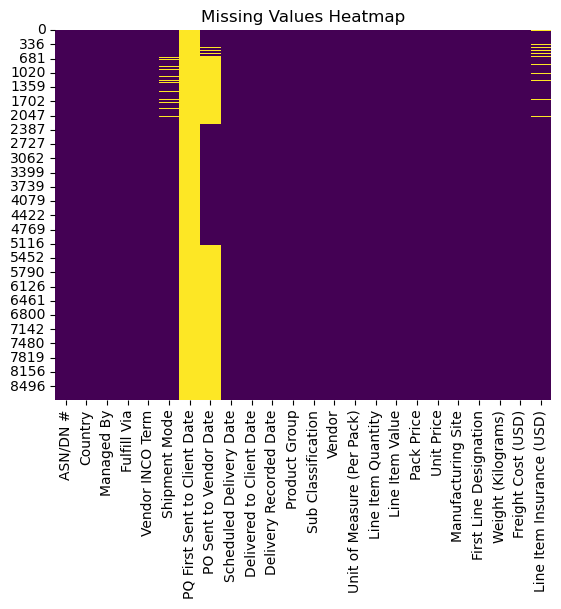

In [36]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [37]:
df.drop(columns=['PQ First Sent to Client Date','Delivery Recorded Date'], inplace=True)
(df.isna().sum()/len(df)*100).sort_values(ascending=False)

PO Sent to Vendor Date        61.143712
Shipment Mode                  3.601427
Line Item Insurance (USD)      2.980094
Unit of Measure (Per Pack)     0.000000
Freight Cost (USD)             0.000000
Weight (Kilograms)             0.000000
First Line Designation         0.000000
Manufacturing Site             0.000000
Unit Price                     0.000000
Pack Price                     0.000000
Line Item Value                0.000000
Line Item Quantity             0.000000
ASN/DN #                       0.000000
Country                        0.000000
Sub Classification             0.000000
Product Group                  0.000000
Delivered to Client Date       0.000000
Scheduled Delivery Date        0.000000
Vendor INCO Term               0.000000
Fulfill Via                    0.000000
Managed By                     0.000000
Vendor                         0.000000
dtype: float64

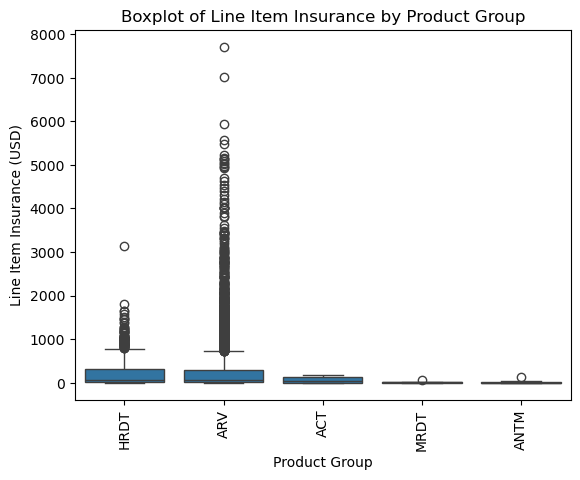

In [38]:
sns.boxplot(x='Product Group',y='Line Item Insurance (USD)',data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Line Item Insurance by Product Group')
plt.show()

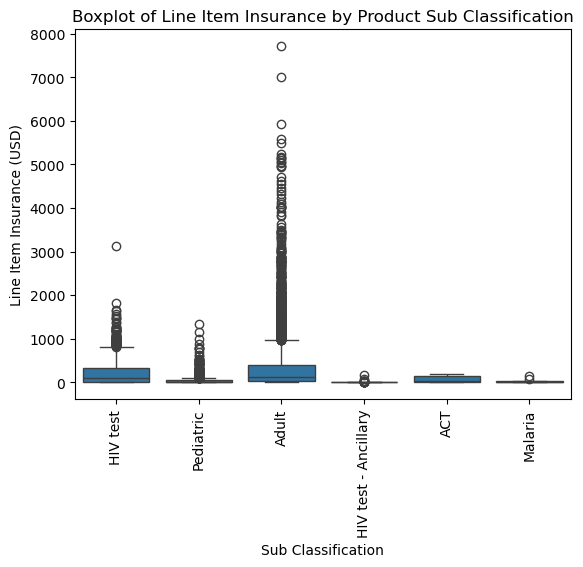

In [39]:
sns.boxplot(x='Sub Classification',y='Line Item Insurance (USD)',data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Line Item Insurance by Product Sub Classification')
plt.show()

In [40]:
df['Line Item Insurance (USD)']=df.groupby('Sub Classification')['Line Item Insurance (USD)'].transform(lambda x: x.fillna(x.median()))

In [41]:
df['Shipment Mode']=df.groupby(['Country',"Fulfill Via"])['Shipment Mode'].transform(lambda x: x.fillna(x.mode()[0]))

In [42]:
(df.isna().sum()/len(df)*100).sort_values(ascending=False)

PO Sent to Vendor Date        61.143712
ASN/DN #                       0.000000
Unit of Measure (Per Pack)     0.000000
Freight Cost (USD)             0.000000
Weight (Kilograms)             0.000000
First Line Designation         0.000000
Manufacturing Site             0.000000
Unit Price                     0.000000
Pack Price                     0.000000
Line Item Value                0.000000
Line Item Quantity             0.000000
Vendor                         0.000000
Country                        0.000000
Sub Classification             0.000000
Product Group                  0.000000
Delivered to Client Date       0.000000
Scheduled Delivery Date        0.000000
Shipment Mode                  0.000000
Vendor INCO Term               0.000000
Fulfill Via                    0.000000
Managed By                     0.000000
Line Item Insurance (USD)      0.000000
dtype: float64

In [43]:
df[df['PO Sent to Vendor Date'].isna()]

,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Product Group,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,NaT,2006-06-02,2006-06-02,HRDT,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13.0,780.34,98.620
1,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,2006-11-14,2006-11-14,ARV,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358.0,4521.50,12.520
2,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,NaT,2006-08-27,2006-08-27,HRDT,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171.0,1653.78,98.620
3,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,2006-09-01,2006-09-01,ARV,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06,120.745
4,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,2006-08-11,2006-08-11,ARV,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590.0,45450.08,120.745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8812,DN-4282,Nigeria,PMO - US,From RDC,From RDC,Air,NaT,2015-06-30,2015-06-22,ARV,...,30,6724,20978.88,3.12,0.10,"Strides, Bangalore, India.",No,6183.0,47281.56,24.690
8813,DN-4307,Zimbabwe,PMO - US,From RDC,From RDC,Truck,NaT,2015-07-31,2015-07-15,ARV,...,60,205243,738874.80,3.60,0.06,"Cipla, Goa, India",No,25880.0,46111.55,869.660
8814,DN-4307,Zimbabwe,PMO - US,From RDC,From RDC,Truck,NaT,2015-07-31,2015-07-15,ARV,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,25880.0,46111.55,705.790
8815,DN-4313,Côte d'Ivoire,PMO - US,From RDC,From RDC,Truck,NaT,2015-07-31,2015-08-06,ARV,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,4426.0,14734.92,161.710


In [44]:
df[~df['PO Sent to Vendor Date'].isna()]

,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Product Group,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
9,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,2006-11-13,2007-01-30,2007-01-30,ARV,...,120,2800,115080.00,41.10,0.34,ABBVIE (Abbott) St. P'burg USA,Yes,643.0,0.00,120.745
10,ASN-223,Zambia,PMO - US,Direct Drop,CIP,Air,2006-12-01,2007-02-16,2007-02-16,ARV,...,120,2800,115080.00,41.10,0.34,ABBVIE Ludwigshafen Germany,Yes,643.0,0.00,120.745
12,ASN-242,Rwanda,PMO - US,Direct Drop,EXW,Air,2006-12-22,2007-02-27,2007-02-27,ARV,...,60,10000,99800.00,9.98,0.17,"Cipla, Goa, India",Yes,7416.0,64179.42,120.745
15,ASN-409,Tanzania,PMO - US,Direct Drop,CIP,Air,2007-04-12,2007-06-06,2007-06-06,ARV,...,200,712,8964.08,12.59,0.06,"BMS Meymac, France",Yes,162.0,912.96,12.520
16,ASN-485,Nigeria,PMO - US,Direct Drop,EXW,Air,2007-05-13,2007-06-19,2007-06-19,HRDT,...,100,1000,80000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,341.0,2682.47,128.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5144,ASN-27582,Zimbabwe,PMO - US,Direct Drop,EXW,Air Charter,2014-05-27,2014-09-17,2014-09-17,ARV,...,30,15187,70163.94,4.62,0.15,Hetero Unit III Hyderabad IN,No,4598.0,25467.64,72.130
5145,ASN-8246,South Africa,PMO - US,Direct Drop,DDP,Air,2010-03-19,2010-09-07,2010-11-17,ARV,...,30,39049,182358.83,4.67,0.16,"Aurobindo Unit III, India",Yes,3669.0,4263.07,393.170
5147,ASN-9408,Vietnam,PMO - US,Direct Drop,EXW,Air,2010-10-18,2011-02-16,2011-02-16,ARV,...,60,15572,22579.40,1.45,0.02,Hetero Unit III Hyderabad IN,No,5359.0,18473.57,48.680
5148,ASN-29372,Vietnam,PMO - US,Direct Drop,EXW,Air,2014-08-11,2014-12-17,2014-12-17,ARV,...,30,5000,17500.00,3.50,0.12,Hetero Unit III Hyderabad IN,No,2517.0,3789.50,17.990


In [45]:
df.shape

(8691, 22)

In [46]:
print(f"Data retained",len(df)/10324*100)

Data retained 84.1824874079814


# Feature Engineering

In [47]:
# Create a new column 'PO Date Missing Flag' to indicate if 'PO Sent to Vendor Date' is missing
df['PO Date Missing Flag'] = df['PO Sent to Vendor Date'].isna().astype(int)
# Create a new column 'Delivery Delay (Days)' to calculate the difference between 'Delivered to Client Date' and 'Scheduled Delivery Date'
df['Delivery Delay (Days)'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days
# Create a new column 'Delivery lead (Days)' to calculate the difference between 'Scheduled Delivery Date' and 'PO Sent to Vendor Date'
df['delivery lead (Days)']=(df['Scheduled Delivery Date']-df['PO Sent to Vendor Date']).dt.days

In [48]:
df.head()

,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Product Group,...,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),PO Date Missing Flag,Delivery Delay (Days),delivery lead (Days)
0,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,NaT,2006-06-02,2006-06-02,HRDT,...,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13.0,780.34,98.620,1,0,NaN
1,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,2006-11-14,2006-11-14,ARV,...,6.20,0.03,"Aurobindo Unit III, India",Yes,358.0,4521.50,12.520,1,0,NaN
2,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,NaT,2006-08-27,2006-08-27,HRDT,...,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171.0,1653.78,98.620,1,0,NaN
3,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,2006-09-01,2006-09-01,ARV,...,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06,120.745,1,0,NaN
4,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,2006-08-11,2006-08-11,ARV,...,3.20,0.05,"Aurobindo Unit III, India",Yes,7590.0,45450.08,120.745,1,0,NaN


In [49]:
delivery_delay=df.groupby(['Country','Managed By','Shipment Mode'])['Delivery Delay (Days)'].mean().reset_index()
delivery_delay=delivery_delay.sort_values(by='Delivery Delay (Days)', ascending=False)

In [50]:
delivery_delay=delivery_delay.sort_values(by='Country')
delivery_delay

,Country,Managed By,Shipment Mode,Delivery Delay (Days)
0,Afghanistan,PMO - US,Air,0.000000
2,Angola,PMO - US,Truck,0.000000
1,Angola,PMO - US,Air,0.000000
3,Benin,PMO - US,Air,2.583333
4,Botswana,PMO - US,Air,-2.327586
...,...,...,...,...
72,Zambia,PMO - US,Truck,-6.957895
74,Zimbabwe,PMO - US,Air Charter,-0.055556
75,Zimbabwe,PMO - US,Ocean,0.000000
76,Zimbabwe,PMO - US,Truck,-15.008174


In [51]:
# Creating function to round the values
def rou(x):
    return round(x)

#### Extracting Daframes for Visualizations

In [52]:
#Ops/Logistics
delivery_delay['Delivery Delay (Days)'] = delivery_delay['Delivery Delay (Days)'].apply(rou)
delivery_delay=delivery_delay.sort_values(by='Delivery Delay (Days)', ascending=False)
delivery_delay

,Country,Managed By,Shipment Mode,Delivery Delay (Days)
54,South Africa,PMO - US,Air,15
9,"Congo, DRC",PMO - US,Air,14
55,South Africa,PMO - US,Ocean,6
19,Ghana,PMO - US,Air,4
3,Benin,PMO - US,Air,3
...,...,...,...,...
44,Nigeria,PMO - US,Air Charter,-19
71,Zambia,PMO - US,Ocean,-25
25,Guyana,PMO - US,Truck,-34
11,Côte d'Ivoire,PMO - US,Air Charter,-36


In [53]:
lead_po=df[~df['delivery lead (Days)'].isna()]

In [54]:
# Planning
delivery_lead=lead_po.groupby(['Country','Managed By','Shipment Mode'])['delivery lead (Days)'].mean().reset_index()
delivery_lead=delivery_lead.sort_values(by='delivery lead (Days)', ascending=False)
delivery_lead['delivery lead (Days)'] = delivery_lead['delivery lead (Days)'].apply(rou)
delivery_lead

,Country,Managed By,Shipment Mode,delivery lead (Days)
31,Pakistan,PMO - US,Air,293
25,Malawi,PMO - US,Ocean,250
12,Ethiopia,PMO - US,Ocean,218
49,Zambia,PMO - US,Ocean,190
37,South Africa,PMO - US,Ocean,184
33,Rwanda,PMO - US,Ocean,180
0,Afghanistan,PMO - US,Air,164
8,Côte d'Ivoire,PMO - US,Ocean,155
28,Mozambique,PMO - US,Ocean,154
50,Zimbabwe,PMO - US,Air,153


In [55]:
# Vendor Performance
vendor_delay=df.groupby("Vendor")['Delivery Delay (Days)'].mean().reset_index()
vendor_delay=vendor_delay.sort_values(by='Delivery Delay (Days)', ascending=False)
vendor_delay['Delivery Delay (Days)']=vendor_delay['Delivery Delay (Days)'].apply(rou)
vendor_delay

,Vendor,Delivery Delay (Days)
8,Aurobindo Pharma Limited,3
15,CIPLA LIMITED,3
7,Abbott GmbH & Co. KG,2
10,BIO-RAD LABORATORIES (FRANCE),2
16,EMCURE PHARMACEUTICALS LTD,2
39,"Orgenics, Ltd",1
44,"SHANGHAI KEHUA BIOENGINEERING CO.,LTD. (KHB)",1
38,Orasure Technologies Inc.,1
45,STRIDES ARCOLAB LIMITED,0
49,"Standard Diagnostics, Inc.",0


In [56]:
# Contractual terms
inco=df.groupby("Vendor INCO Term")['Delivery Delay (Days)'].mean().reset_index()
inco=inco.sort_values(by='Delivery Delay (Days)', ascending=False)
inco['Delivery Delay (Days)']=inco['Delivery Delay (Days)'].apply(rou)
inco

,Vendor INCO Term,Delivery Delay (Days)
3,DDP,8
6,FCA,0
5,EXW,0
0,CIF,0
2,DAP,0
4,DDU,0
1,CIP,-1
7,From RDC,-8


In [57]:
# Product Types
product_group=df.groupby("Sub Classification")['Delivery Delay (Days)'].mean().reset_index()
product_group=product_group.sort_values(by='Delivery Delay (Days)', ascending=False)
product_group['Delivery Delay (Days)']=product_group['Delivery Delay (Days)'].apply(rou)
product_group

,Sub Classification,Delivery Delay (Days)
2,HIV test,0
3,HIV test - Ancillary,0
4,Malaria,-2
5,Pediatric,-4
1,Adult,-6
0,ACT,-11


In [58]:
# Product Risk
product_insurance=df.groupby("Sub Classification")['Line Item Insurance (USD)'].mean().reset_index()
product_insurance=product_insurance.sort_values(by='Line Item Insurance (USD)', ascending=False)
product_insurance['Line Item Insurance (USD)']=product_insurance['Line Item Insurance (USD)'].apply(rou)
product_insurance

,Sub Classification,Line Item Insurance (USD)
1,Adult,349
2,HIV test,213
0,ACT,68
5,Pediatric,45
4,Malaria,16
3,HIV test - Ancillary,5


In [59]:
# Cost Efficiency
shipment_cost=df.groupby(['Country','Shipment Mode'])[['Freight Cost (USD)','Weight (Kilograms)']].mean().reset_index()
shipment_cost=shipment_cost.sort_values(by='Freight Cost (USD)', ascending=False)
shipment_cost=shipment_cost.sort_values(by='Country')
shipment_cost

,Country,Shipment Mode,Freight Cost (USD),Weight (Kilograms)
0,Afghanistan,Air,545.513333,52.333333
1,Angola,Air,6166.414000,362.200000
2,Angola,Truck,982.315000,51.500000
3,Benin,Air,15917.660833,3744.583333
5,Botswana,Truck,1088.306667,891.166667
...,...,...,...,...
71,Zambia,Truck,12055.203411,8866.174737
75,Zimbabwe,Truck,13995.695450,10593.839237
74,Zimbabwe,Ocean,21153.023333,6608.666667
73,Zimbabwe,Air Charter,30701.736667,4463.555556


In [60]:
# Mode Strategy
mode_selection=df.groupby(['Country','Sub Classification','Shipment Mode'])[['Freight Cost (USD)','Weight (Kilograms)']].mean().reset_index()
mode_selection=mode_selection.sort_values(by='Freight Cost (USD)', ascending=False)
mode_selection=mode_selection.sort_values(by='Country')
mode_selection

,Country,Sub Classification,Shipment Mode,Freight Cost (USD),Weight (Kilograms)
0,Afghanistan,Malaria,Air,545.513333,52.333333
1,Angola,HIV test,Air,11694.000000,562.500000
2,Angola,HIV test,Truck,982.315000,51.500000
3,Angola,Pediatric,Air,2481.356667,228.666667
4,Benin,Adult,Air,18318.805000,4453.800000
...,...,...,...,...,...
169,Zimbabwe,HIV test,Truck,4375.238333,1013.833333
166,Zimbabwe,Adult,Air Charter,30701.736667,4463.555556
173,Zimbabwe,Pediatric,Ocean,21153.023333,6608.666667
171,Zimbabwe,HIV test - Ancillary,Truck,2185.820000,526.000000


In [61]:
# High stakes shipments
high_value_items=df.groupby('Sub Classification')[['Line Item Value','Freight Cost (USD)','Line Item Insurance (USD)','Delivery Delay (Days)']].mean().reset_index()
high_value_items=high_value_items.sort_values(by='Line Item Value', ascending=False)
high_value_items=high_value_items.sort_values(by='Sub Classification')
high_value_items['Delivery Delay (Days)']=high_value_items['Delivery Delay (Days)'].apply(rou)
high_value_items

,Sub Classification,Line Item Value,Freight Cost (USD),Line Item Insurance (USD),Delivery Delay (Days)
0,ACT,41523.808750,8844.246250,68.250000,-11
1,Adult,231933.081105,13369.185794,348.708976,-6
2,HIV test,142331.856106,12515.708200,212.557516,0
3,HIV test - Ancillary,3348.303619,5347.390857,4.904190,0
4,Malaria,12397.916429,6199.575714,16.492143,-2
5,Pediatric,31712.733790,9191.554880,44.619171,-4


In [62]:
# Pricing Behaviour
prices=df.groupby('Sub Classification')[['Pack Price','Delivery Delay (Days)']].mean().reset_index()
prices=prices.sort_values(by='Pack Price', ascending=False)
prices=prices.sort_values(by='Sub Classification')
prices['Delivery Delay (Days)']=prices['Delivery Delay (Days)'].apply(rou)
prices

,Sub Classification,Pack Price,Delivery Delay (Days)
0,ACT,31.425625,-11
1,Adult,12.187386,-6
2,HIV test,68.903824,0
3,HIV test - Ancillary,8.612571,0
4,Malaria,26.818929,-2
5,Pediatric,7.848824,-4


# **Data Manipulations done**

**1. Data Cleaning**
    * Dropped unnecessary columns
    * Renamed columns for clarity
    * Removed duplicates
    * Filtered data based on specific conditions (e.g., delivery status)

**2. Handling Missing Values**
    * Checked missing value counts
    * Imputed or removed rows with missing critical values

**3. Feature Engineering**
    * Created new columns like:
        * delay_days (difference between scheduled and actual delivery)
        * Lead time metrics
    * Extracted country, mode of shipment, and vendor-based metrics.

**4. Data Aggregation**
    * Grouped data by Country, Mode of Shipment, Vendor, and INCO Terms for comparative analysis.
    * Aggregated delay data and average delivery times

**5. Data Filtering for Visualizations**
    * Created filtered DataFrames for specific plots

# Data Visualization Charts

### Chart-1

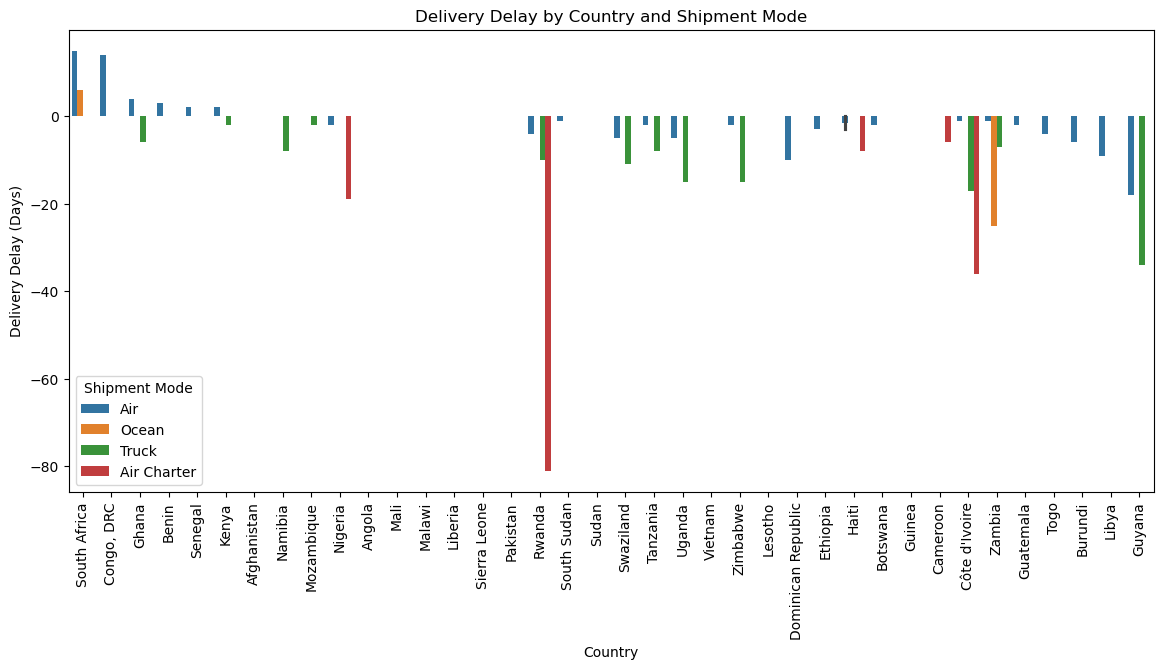

In [63]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Country',y='Delivery Delay (Days)',hue='Shipment Mode',data=delivery_delay)
plt.title('Delivery Delay by Country and Shipment Mode')
plt.xticks(rotation=90)
plt.show()

#### Why is this graph ?

* To analyze delivery delays by country and shipment mode, which helps in identifying delays occurance and also compare performance accross countries.

#### What are the insights from this graph?

* Air Charter are more reliable with minimal delays.
* Rwanda, Cote d'lvoire show large negatives indicating early deliveries.
* Countries like South Africa, Congo face delays indicating late deliveries are common there.

### Chart-2

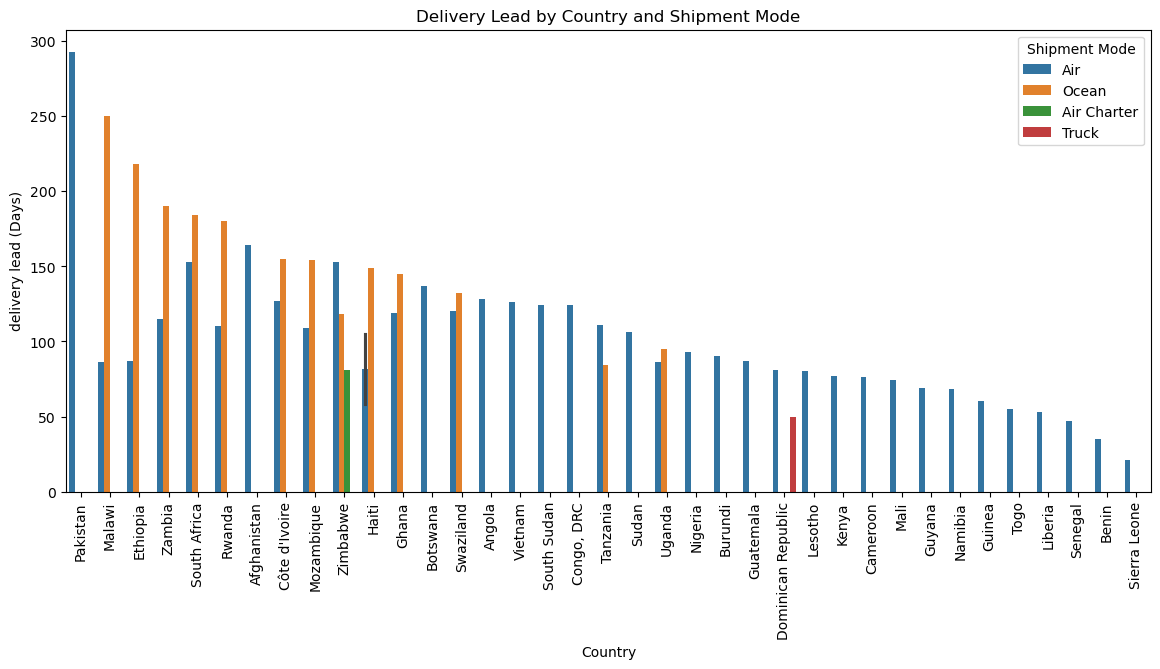

In [64]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Country',y='delivery lead (Days)',hue='Shipment Mode',data=delivery_lead)
plt.title('Delivery Lead by Country and Shipment Mode')
plt.xticks(rotation=90)
plt.show()

#### Why is this graph ?

* To compare delivery lead times by country and shipment mode.

#### What are the insights from this graph?

* Air & Ocean dominate with Ocean generally having longer lead times especially in pakistan, Malawi and Ethiopia.
* Countries like Sierra Leone, Benin, and Senegal have shortest lead times, showing efficient delivery, especially via air.

### Chart-3

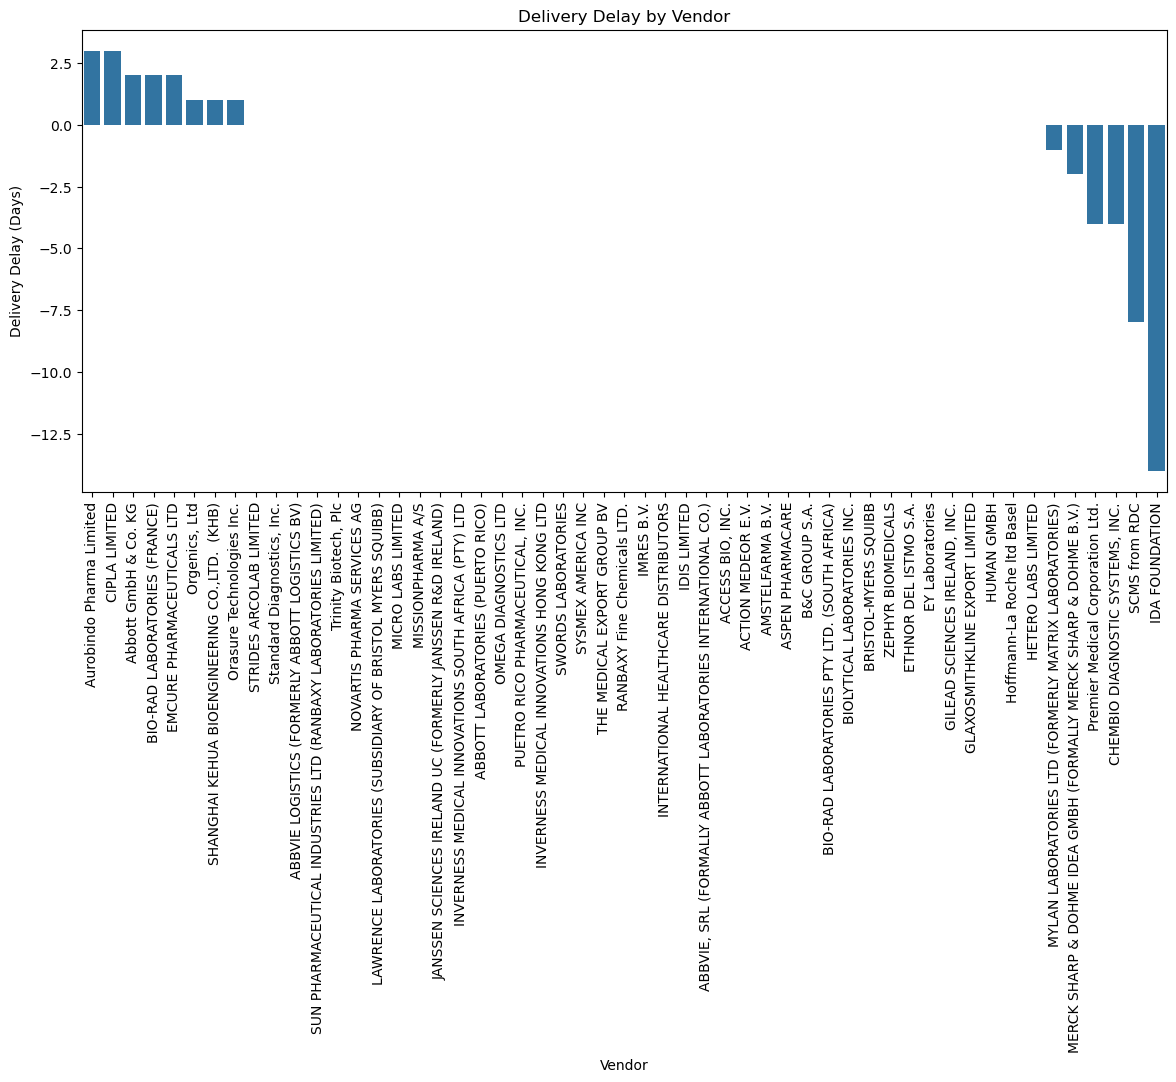

In [65]:
plt.figure(figsize=(14, 6))
sns.barplot(x="Vendor", y="Delivery Delay (Days)", data=vendor_delay)
plt.title('Delivery Delay by Vendor')
plt.xticks(rotation=90)
plt.show()

#### Why is this graph ?

* To quickly evaluating delivery performance by vendor.

#### What are the insights from this graph?

* Aurobindo Pharma and a few others have small positive delays, indicating slightly late deliveries.

* Most Vendors to the right show zero to negative delays indicating on-time deliveries and early deliveries

### Chart-4

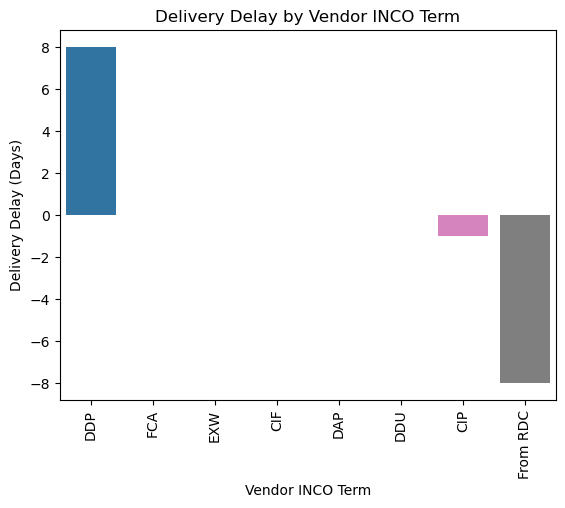

In [66]:
sns.barplot(x='Vendor INCO Term',y='Delivery Delay (Days)',data=inco,hue='Vendor INCO Term')
plt.title('Delivery Delay by Vendor INCO Term')
plt.xticks(rotation=90)
plt.show()

#### Why is this graph ?

* To analyze delivery delays by INCO terms used by vendors.

#### What are the insights from this graph?

* DDP shows the highest delay and RDC shows negative dely indicating early deliveries.
* CIP has some early delivery compared to others.

### Chart-5

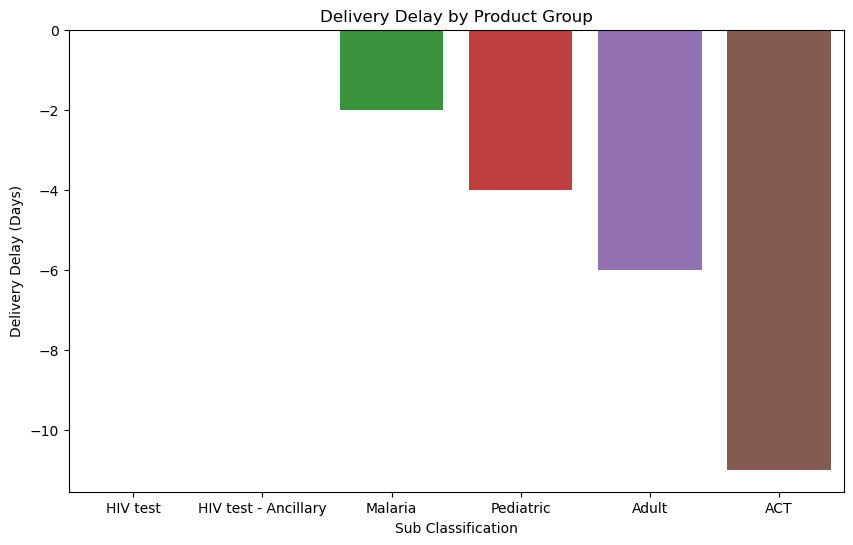

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Sub Classification", y="Delivery Delay (Days)", data=product_group,hue='Sub Classification')
plt.title('Delivery Delay by Product Group')
plt.show()

#### Why is this graph ?

* Indiacates delivery performance across different product sub categories.


#### What are the insights from this graph?

* ACT shows largest early delivery followed by Adult and Pediatric products.
* Malaria and HIV Test- Ancillary  also tend to arrive early.
* HIV Kits show no delay indicating on-time delivery.

### Chart-6

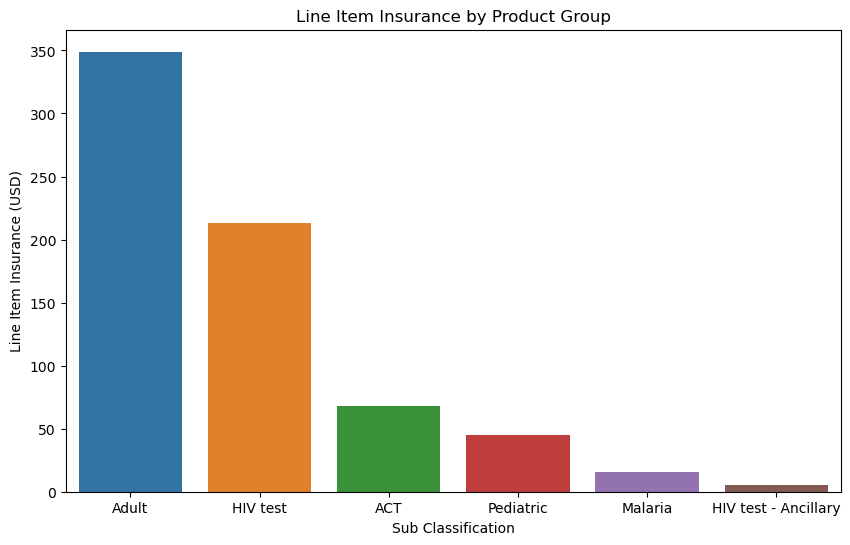

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Sub Classification",y="Line Item Insurance (USD)",data=product_insurance,hue='Sub Classification')
plt.title('Line Item Insurance by Product Group')
plt.show()

#### Why is this graph ?

* To compare insurance costs across different product groups
* Helps assess financial risk exposure by product category

#### What are the insights from this graph?

* Adult products have highest insurance cost.
* ACT and Pediatric products fall in mid range, indicating moderate risk.
* Malaria and HIV-test have minimal insurance values , suggesting low unit cost.

### Chart-7

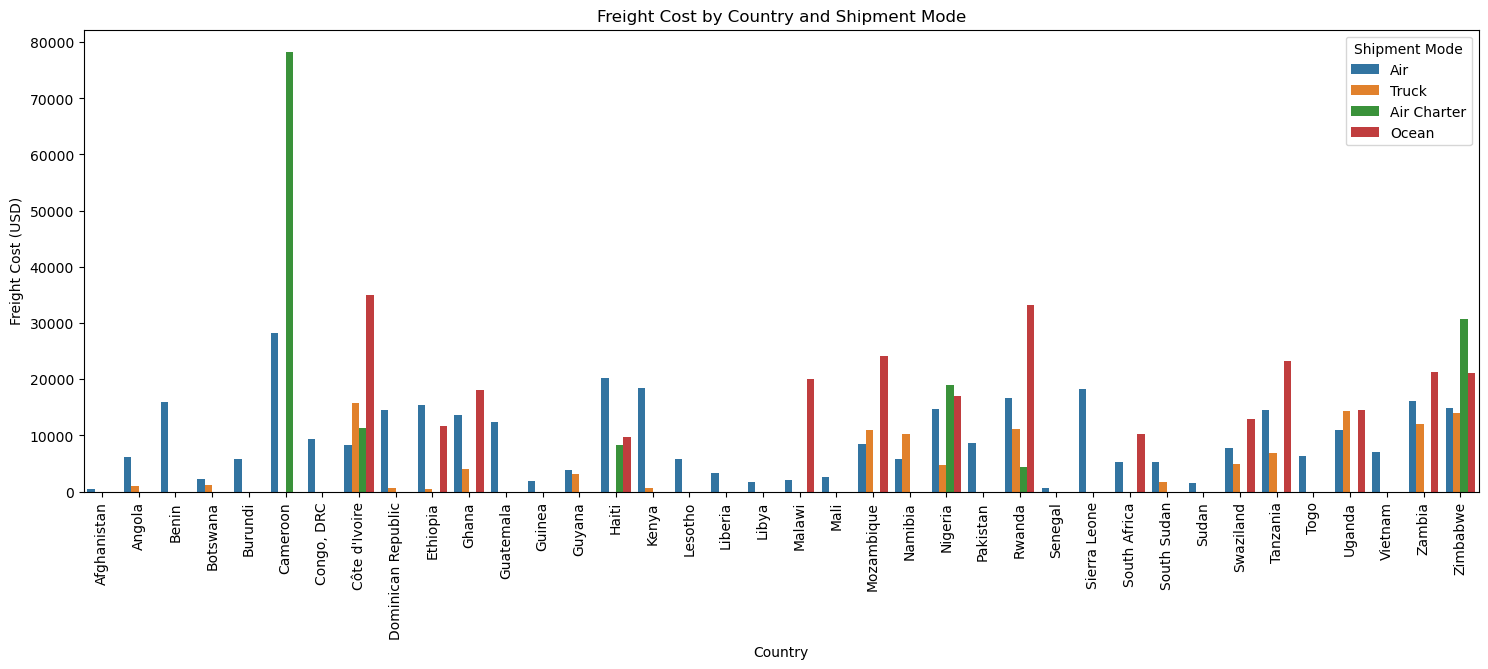

In [69]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Country',y="Freight Cost (USD)",data=shipment_cost,hue='Shipment Mode')
plt.title('Freight Cost by Country and Shipment Mode')
plt.xticks(rotation=90)
plt.show()

#### Why is this graph ?

* Freight costs across different countries by different shipment modes.
* helps in choosing cost-effective shipments methods.

#### What are the insights from this graph?

* Air charter is extremely expensive in countries like Cameron and Zimbabwe- indicating urgent or high-volume shipments.
* Ocean shipping shows high costs in countries like Côte d’Ivoire, Mozambique, Rwanda, and Tanzania possibly due to port handling or volume.
* Air is most common shipment method.
* Truck shipment is less prefered .

### Chart-8

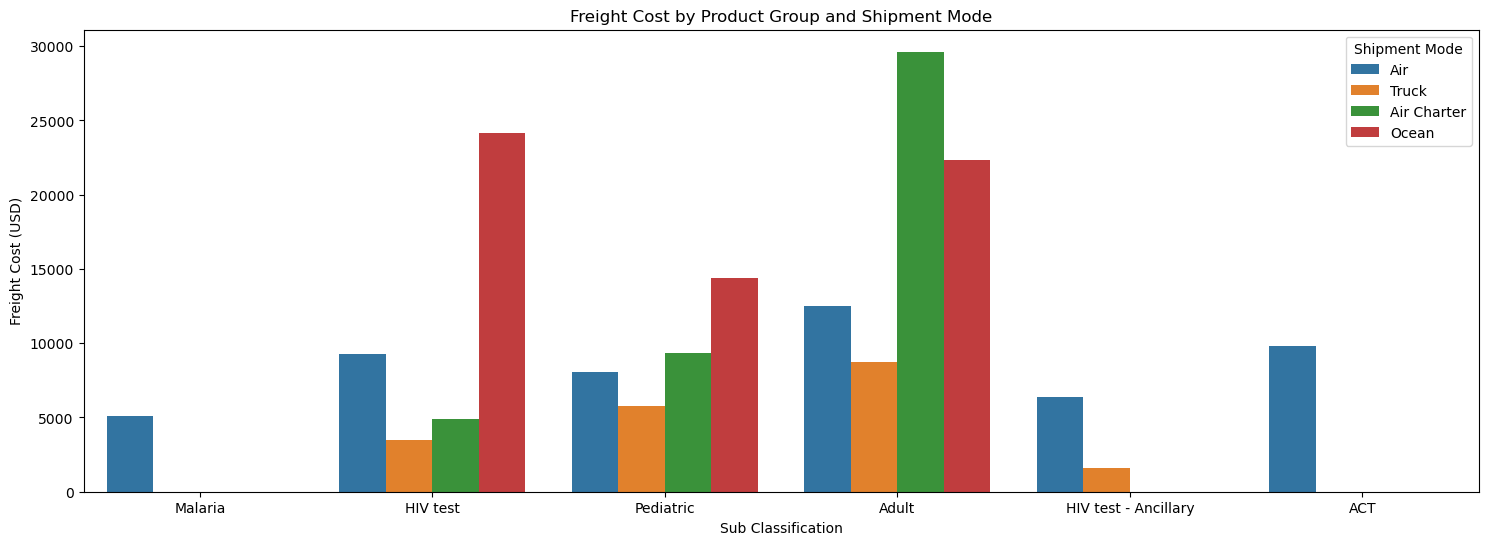

In [70]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Sub Classification', y="Freight Cost (USD)", data=mode_selection, hue='Shipment Mode', errorbar=None)
plt.title('Freight Cost by Product Group and Shipment Mode')
plt.show()

#### Why is this graph ?

* Determining the most cost effective mode of transport per product category.

#### What are the insights from this graph?

* Adult products have higher freight costs especially via Air charter and ocean.
* HIV Test products have high cost through ocean.
* Pediatric products lean on Air charter and ocean.
* ACT and Malaria have no data indicating distribution from RDC.

### Chart-9

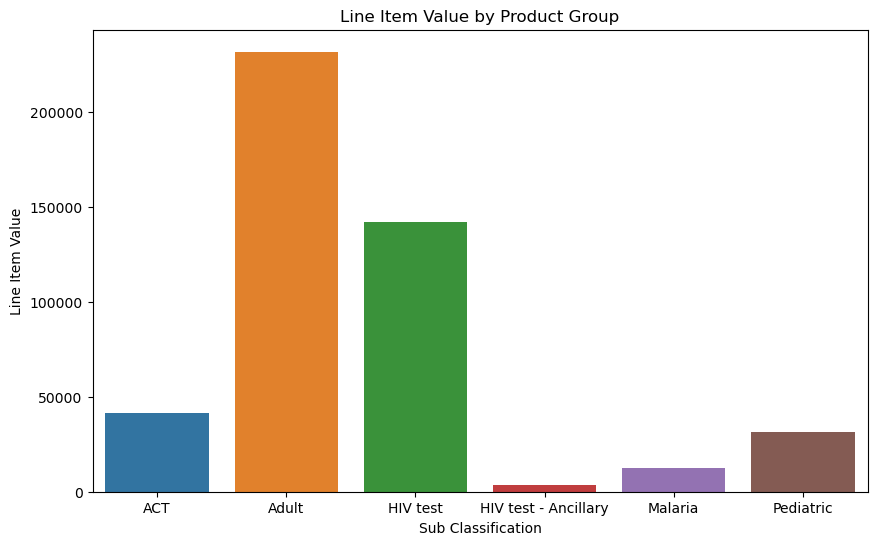

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub Classification',y='Line Item Value',data=high_value_items,hue='Sub Classification')
plt.title('Line Item Value by Product Group')
plt.show()

#### Why is this graph ?

* Helps in prioritize inventory, understand product value distributions and insurance considerations.

#### What are the insights from this graph?

* Adult products have highest total value indicating high-cost items or bulk orderings. Followed by HIV Test.
* ACT and Pediatric follow moderate values.
* Malaria and HIV test - Ancillary products have much lower values, possibly due to lower cost or smaller quantities.

### Chart-10

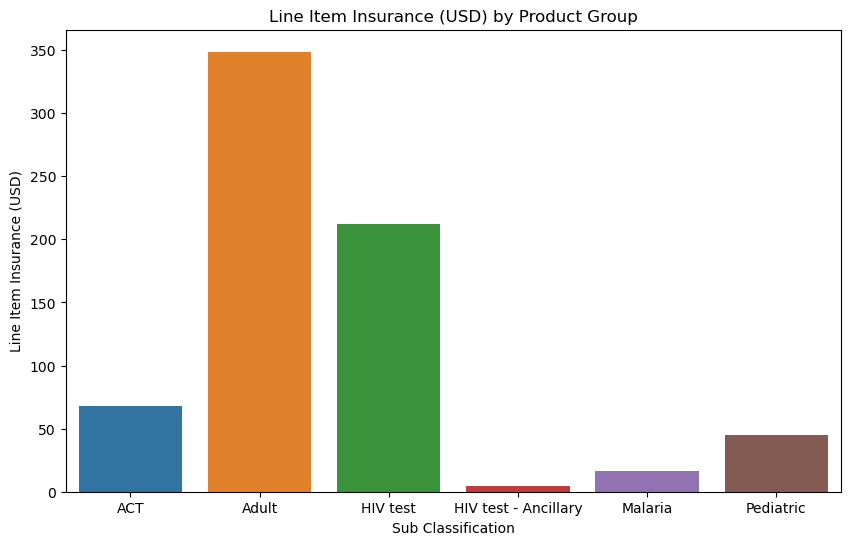

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub Classification',y='Line Item Insurance (USD)',data=high_value_items,hue='Sub Classification')
plt.title('Line Item Insurance (USD) by Product Group')
plt.show()

#### Why is this graph ?

* Helps to understand Insurance applied to different product categories, determining the risk of shipment of those products.

#### What are the insights from this graph?

* Adult products have highest insurance indicating high-cost items or bulk orderings. Followed by HIV Test.
* ACT and Pediatric follow moderate values.
* Malaria and HIV test - Ancillary products have much lower values, possibly due ordering smaller quantities.

### Chart-11

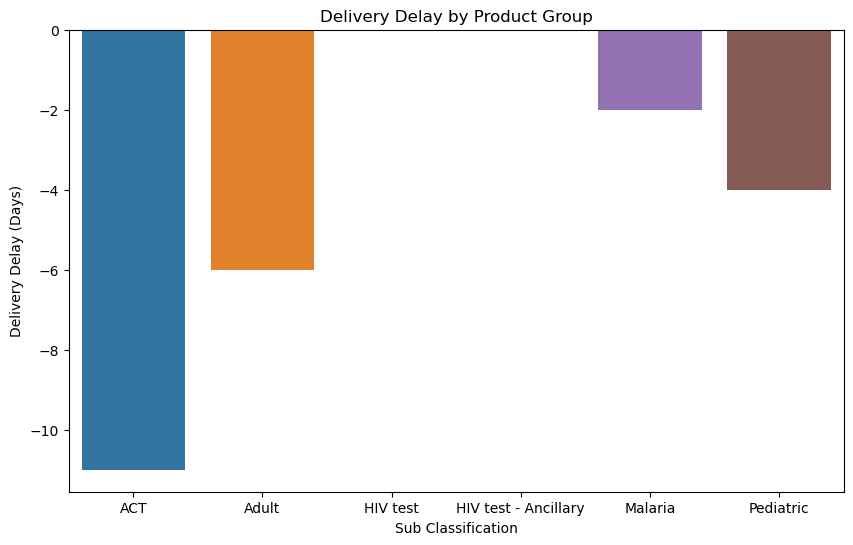

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub Classification',y='Delivery Delay (Days)',data=high_value_items,hue='Sub Classification')
plt.title('Delivery Delay by Product Group')
plt.show()

#### Why is this graph ?

* Helps us to understand the delivery performance of different product categries.

#### What are the insights from this graph?

* Other than HIV test and HIV test-Ancillary which show on-time delivery, all products show early deliveries.

### Chart-12

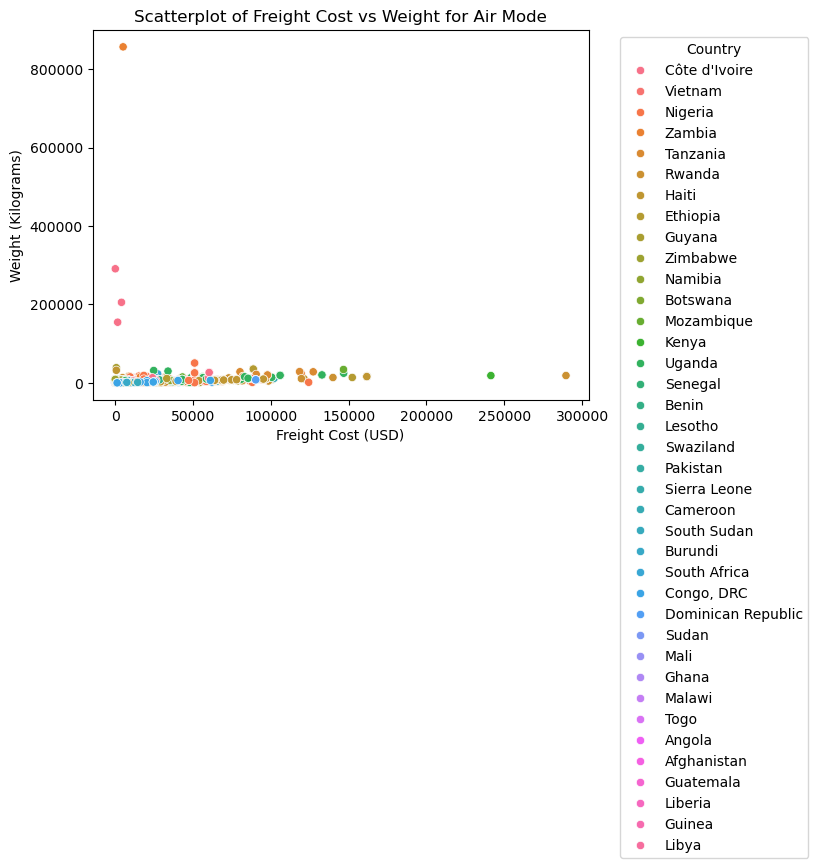

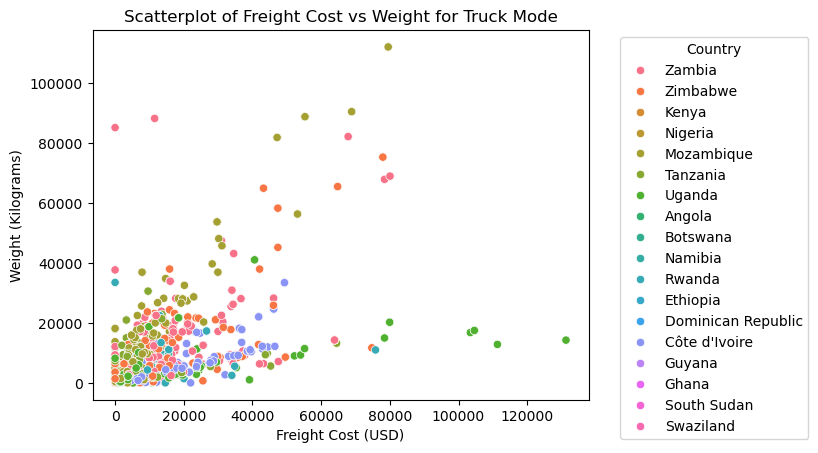

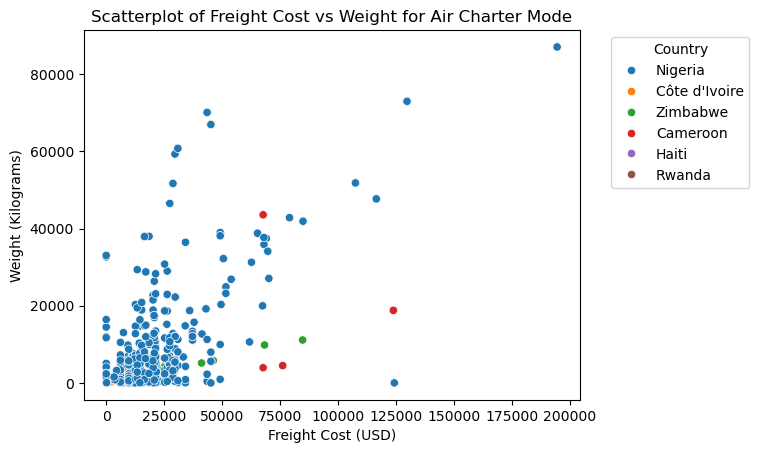

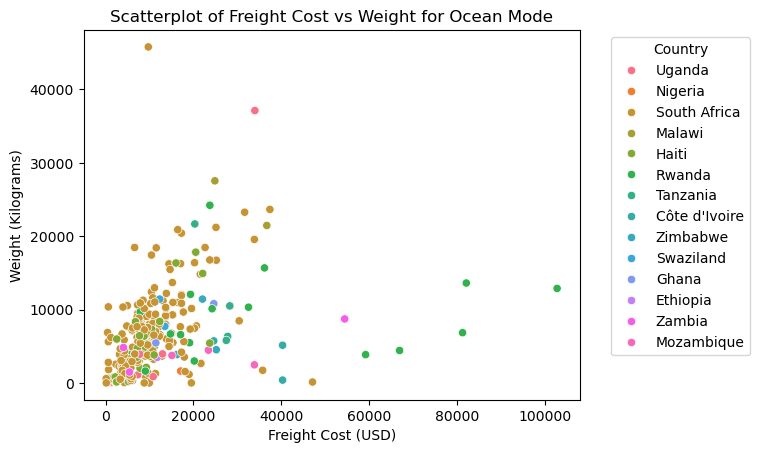

In [75]:
for x in df['Shipment Mode'].unique():
    g=df[df["Shipment Mode"]==x]
    plt.Figure(figsize=(14, 8))
    sns.scatterplot(x='Freight Cost (USD)',y='Weight (Kilograms)',data=g,hue='Country')
    plt.title(f'Scatterplot of Freight Cost vs Weight for {x} Mode')
    plt.xlabel('Freight Cost (USD)')
    plt.ylabel('Weight (Kilograms)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')  # Move legend outside
    plt.show()

#### Why is this graph ?

* Helps to find correlation between Freight Cost and Weight, also by adding colours, we can find the which major mode is preffered by which countries.

#### What are the insights from this graph?

* Most of the points are clustered around low freight cost and low weight regions.
* Air charter mode is least utilized mode for deliveries and Air mode is most preffered which delivers to vast countries.

### Chart-13

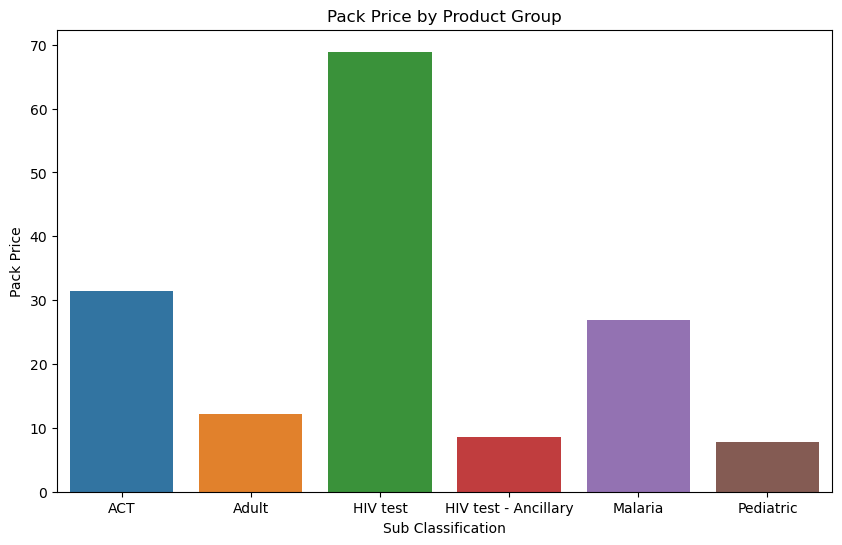

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub Classification',y='Pack Price',data=prices,hue='Sub Classification')
plt.title('Pack Price by Product Group')
plt.show()

#### Why is this graph ?

* Helps us to understand the pack price across different product categories.

#### What are the insights from this graph?

* HIV test shows highest pack price followed by ACT.
* Adult shows moderate cost.
* Pediatric and HIV test- Ancillary shows least pack prices.

### Chart-14

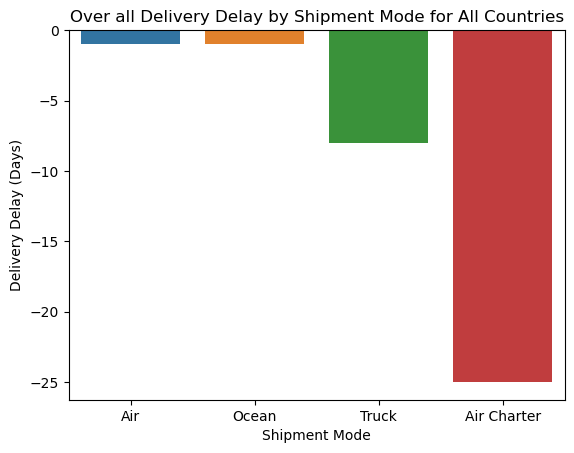

In [79]:
shipment_delay=delivery_delay.groupby(['Shipment Mode'])['Delivery Delay (Days)'].mean().reset_index()
shipment_delay=shipment_delay.sort_values(by='Delivery Delay (Days)', ascending=False)
shipment_delay['Delivery Delay (Days)']=shipment_delay['Delivery Delay (Days)'].apply(rou)

sns.barplot(x='Shipment Mode',y='Delivery Delay (Days)',data=shipment_delay,hue='Shipment Mode')
plt.title('Over all Delivery Delay by Shipment Mode for All Countries')
plt.show()

#### Why is this graph ?

* These two graphs shows the delay across different shipment modes.

#### What are the insights from this graph?

* Almost all modes deliver early with Air charter delivering too early among others.

### Chart-15 Price distribution by Shipment Mode

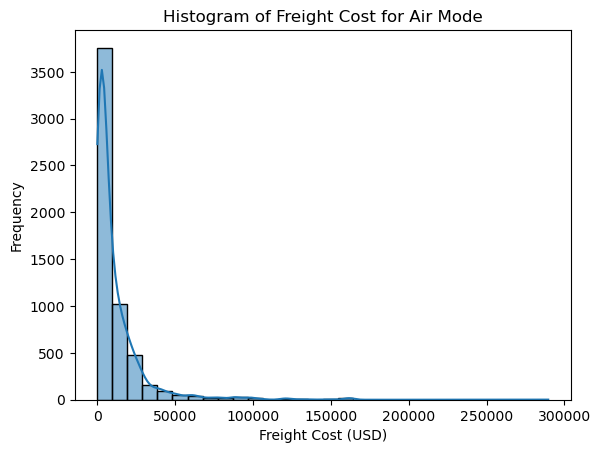

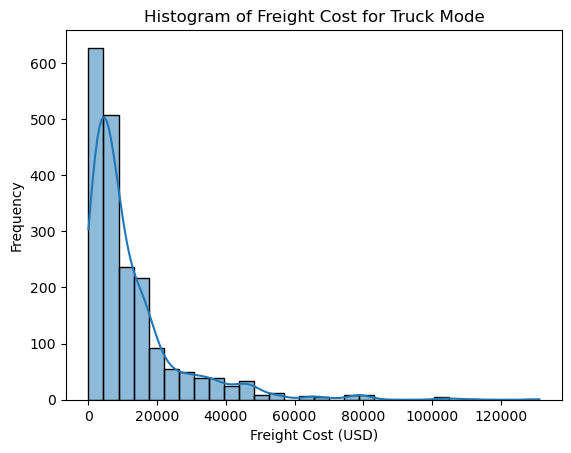

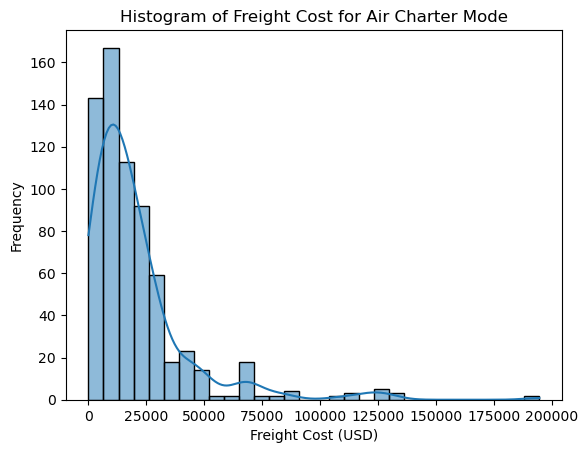

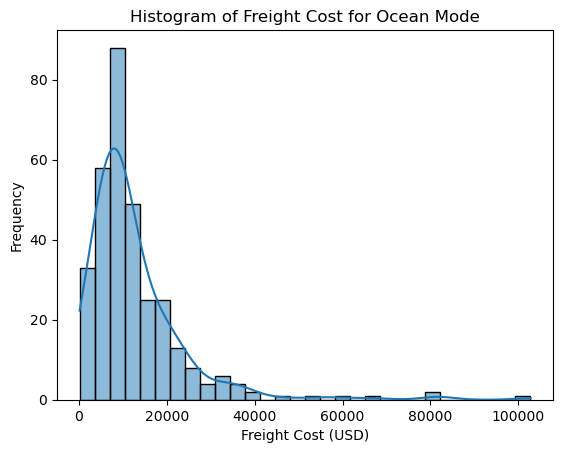

In [ ]:
for x in df['Shipment Mode'].unique():
    g=df[df["Shipment Mode"]==x]
    plt.Figure(figsize=(14, 8))
    sns.histplot(x='Freight Cost (USD)',data=g,kde=True)
    plt.title(f'Histogram of Freight Cost for {x} Mode')
    plt.xlabel('Freight Cost (USD)')
    plt.ylabel('Frequency')
    plt.show()

#### Why is this graph ?
#### What are the insights from this graph?

### Chart-16- Weight Distribution by Shipment Mode

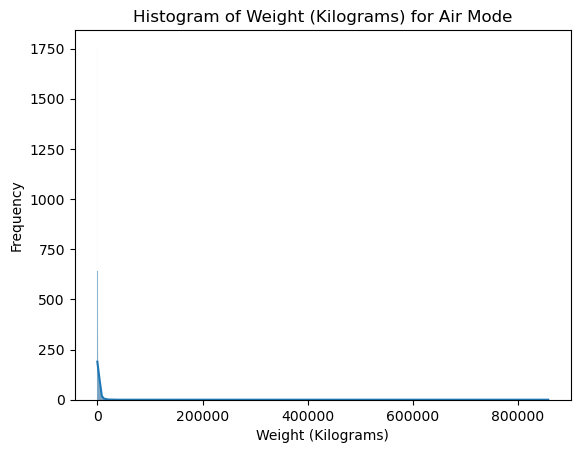

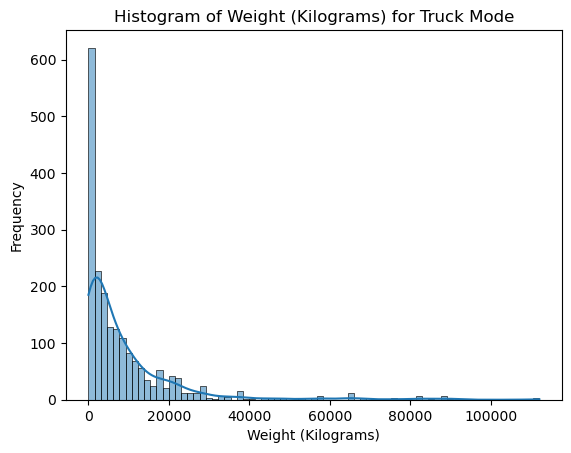

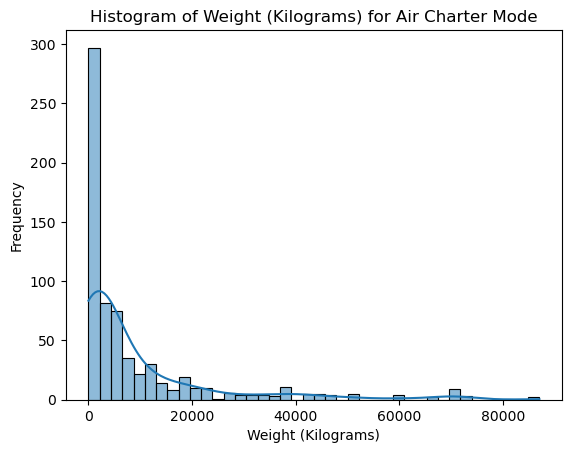

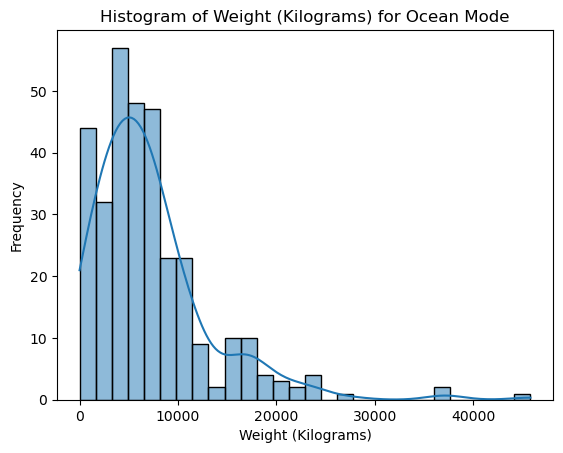

In [85]:
for x in df['Shipment Mode'].unique():
    g=df[df["Shipment Mode"]==x]
    plt.Figure(figsize=(14, 8))
    sns.histplot(x='Weight (Kilograms)',data=g,kde=True)
    plt.title(f'Histogram of Weight (Kilograms) for {x} Mode')
    plt.xlabel('Weight (Kilograms)')
    plt.ylabel('Frequency')
    plt.show()

#### Why is this graph ?

* Understand the distributions of weight across different shipment modes.

#### What are the insights from this graph?

* Air mode shows less frequent weights which is expected in air transportation.
* Truck and Air charter show right-skewness.
* Ocean also show right-skewness and also bi-modal nature.

### Chart-17- Insurance Distribution by Shipment Mode

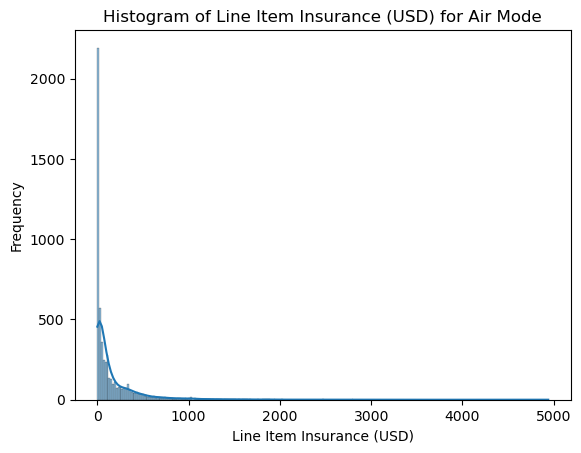

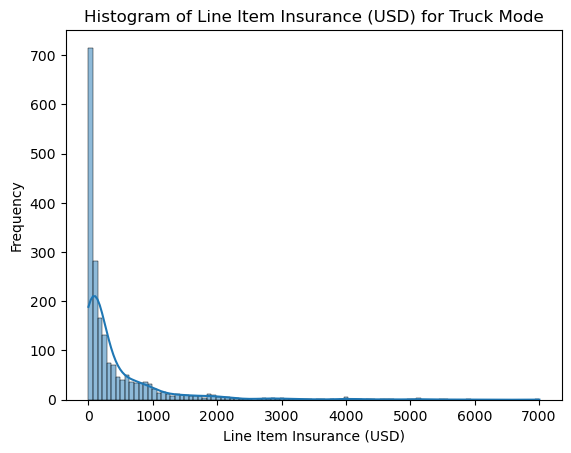

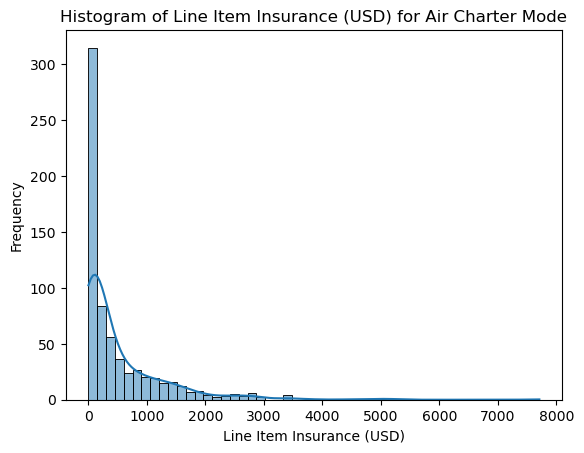

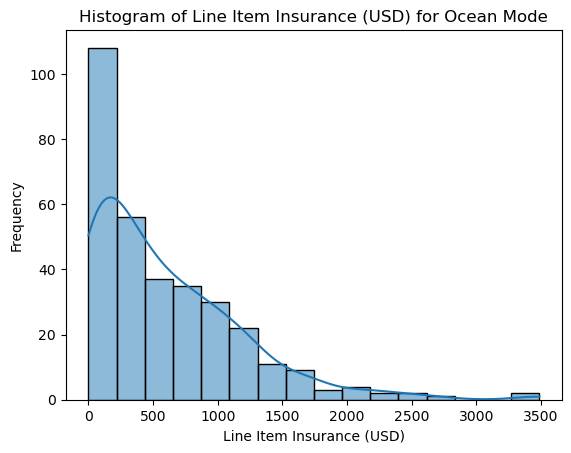

In [86]:
for x in df['Shipment Mode'].unique():
    g=df[df["Shipment Mode"]==x]
    plt.Figure(figsize=(14, 8))
    sns.histplot(x='Line Item Insurance (USD)',data=g,kde=True)
    plt.title(f'Histogram of Line Item Insurance (USD) for {x} Mode')
    plt.xlabel('Line Item Insurance (USD)')
    plt.ylabel('Frequency')
    plt.show()

#### Why is this graph ?

* To understand the insurance distribution for various types of shipment modes.

#### What are the insights from this graph?

* All the graphs are right-skewed. Indicating high risk items are shipped less.
* Air charter mode shows higher insurance range, while ocean shows lower range indicating low risk items are shipped through oceans.

### Chart-18- Item Quantity by Shipment Mode

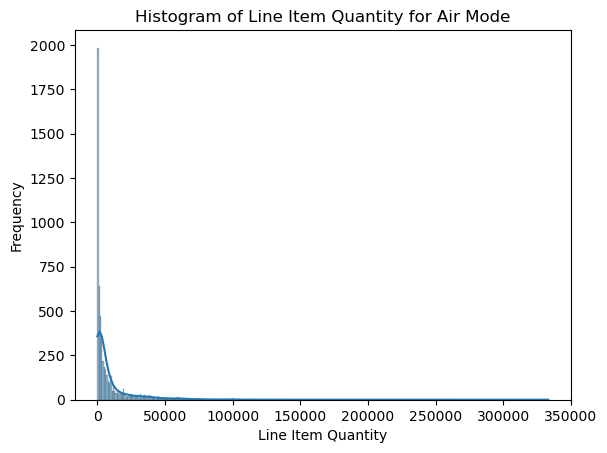

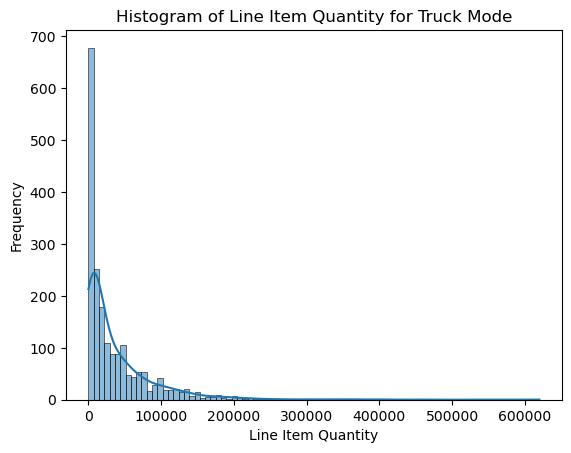

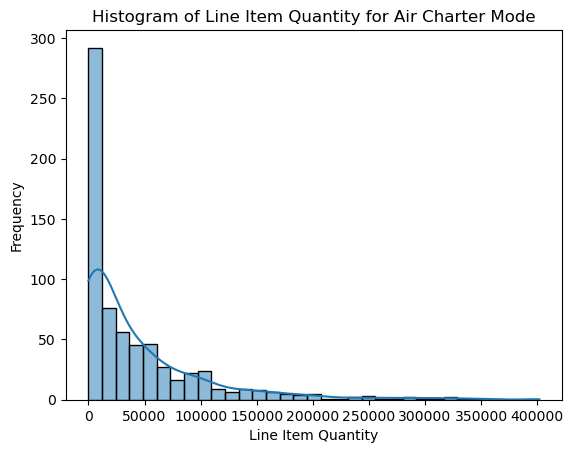

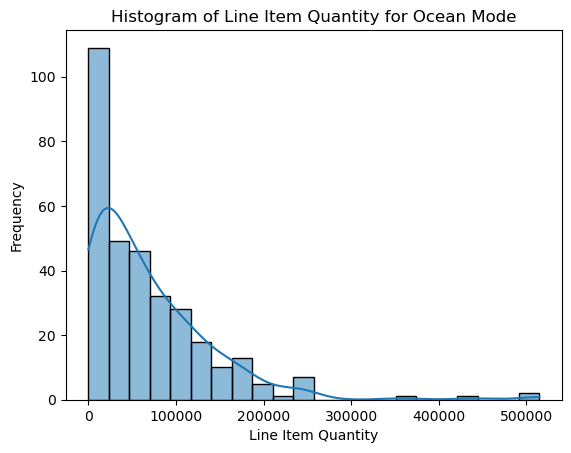

In [87]:
for x in df['Shipment Mode'].unique():
    g=df[df["Shipment Mode"]==x]
    plt.Figure(figsize=(14, 8))
    sns.histplot(x='Line Item Quantity',data=g,kde=True)
    plt.title(f'Histogram of Line Item Quantity for {x} Mode')
    plt.xlabel('Line Item Quantity')
    plt.ylabel('Frequency')
    plt.show()

#### Why is this graph ?

* To undestand how much quantity is being shipped on various modes.

#### What are the insights from this graph?

* Truck shipment contains max range of quantities of products followed by Ocean, Air charter and Air modes.
* Most values lie less than 25000 for Air mode, 75000 for truck mode, 60000 for Air charter mode and 15000 for Ocean modes.

### Chart-19 - Correlation Matrix

In [88]:
df.columns

Index(['ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
       'Shipment Mode', 'PO Sent to Vendor Date', 'Scheduled Delivery Date',
       'Delivered to Client Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'PO Date Missing Flag',
       'Delivery Delay (Days)', 'delivery lead (Days)'],
      dtype='object')

In [89]:
df.head()

,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Product Group,...,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),PO Date Missing Flag,Delivery Delay (Days),delivery lead (Days)
0,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,NaT,2006-06-02,2006-06-02,HRDT,...,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13.0,780.34,98.620,1,0,NaN
1,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,2006-11-14,2006-11-14,ARV,...,6.20,0.03,"Aurobindo Unit III, India",Yes,358.0,4521.50,12.520,1,0,NaN
2,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,NaT,2006-08-27,2006-08-27,HRDT,...,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171.0,1653.78,98.620,1,0,NaN
3,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,2006-09-01,2006-09-01,ARV,...,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855.0,16007.06,120.745,1,0,NaN
4,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,2006-08-11,2006-08-11,ARV,...,3.20,0.05,"Aurobindo Unit III, India",Yes,7590.0,45450.08,120.745,1,0,NaN


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8691 entries, 0 to 8816
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ASN/DN #                    8691 non-null   object        
 1   Country                     8691 non-null   object        
 2   Managed By                  8691 non-null   object        
 3   Fulfill Via                 8691 non-null   object        
 4   Vendor INCO Term            8691 non-null   object        
 5   Shipment Mode               8691 non-null   object        
 6   PO Sent to Vendor Date      3377 non-null   datetime64[ns]
 7   Scheduled Delivery Date     8691 non-null   datetime64[ns]
 8   Delivered to Client Date    8691 non-null   datetime64[ns]
 9   Product Group               8691 non-null   object        
 10  Sub Classification          8691 non-null   object        
 11  Vendor                      8691 non-null   object        
 1

In [ ]:
# Label encoding the text columns for correlation matrix
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in df.columns:
    if df[x].dtype==object:
        df[x]=le.fit_transform(df[x])
df.head()


,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Product Group,...,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),PO Date Missing Flag,Delivery Delay (Days),delivery lead (Days)
0,2766,7,1,0,5,0,NaT,2006-06-02,2006-06-02,3,...,29.00,0.97,65,1,13.0,780.34,98.620,1,0,NaN
1,2824,35,1,0,5,0,NaT,2006-11-14,2006-11-14,2,...,6.20,0.03,9,1,358.0,4521.50,12.520,1,0,NaN
2,491,7,1,0,6,0,NaT,2006-08-27,2006-08-27,3,...,80.00,0.80,4,1,171.0,1653.78,98.620,1,0,NaN
3,2348,35,1,0,5,0,NaT,2006-09-01,2006-09-01,2,...,3.99,0.07,68,1,1855.0,16007.06,120.745,1,0,NaN
4,2399,35,1,0,5,0,NaT,2006-08-11,2006-08-11,2,...,3.20,0.05,9,1,7590.0,45450.08,120.745,1,0,NaN


In [92]:
df.drop(['PO Sent to Vendor Date','Scheduled Delivery Date','Delivered to Client Date'],axis=1,inplace=True)
df.head()

,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,Sub Classification,Vendor,Unit of Measure (Per Pack),...,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),PO Date Missing Flag,Delivery Delay (Days),delivery lead (Days)
0,2766,7,1,0,5,0,3,2,42,30,...,29.00,0.97,65,1,13.0,780.34,98.620,1,0,NaN
1,2824,35,1,0,5,0,2,5,8,240,...,6.20,0.03,9,1,358.0,4521.50,12.520,1,0,NaN
2,491,7,1,0,6,0,3,2,7,100,...,80.00,0.80,4,1,171.0,1653.78,98.620,1,0,NaN
3,2348,35,1,0,5,0,2,1,46,60,...,3.99,0.07,68,1,1855.0,16007.06,120.745,1,0,NaN
4,2399,35,1,0,5,0,2,1,8,60,...,3.20,0.05,9,1,7590.0,45450.08,120.745,1,0,NaN


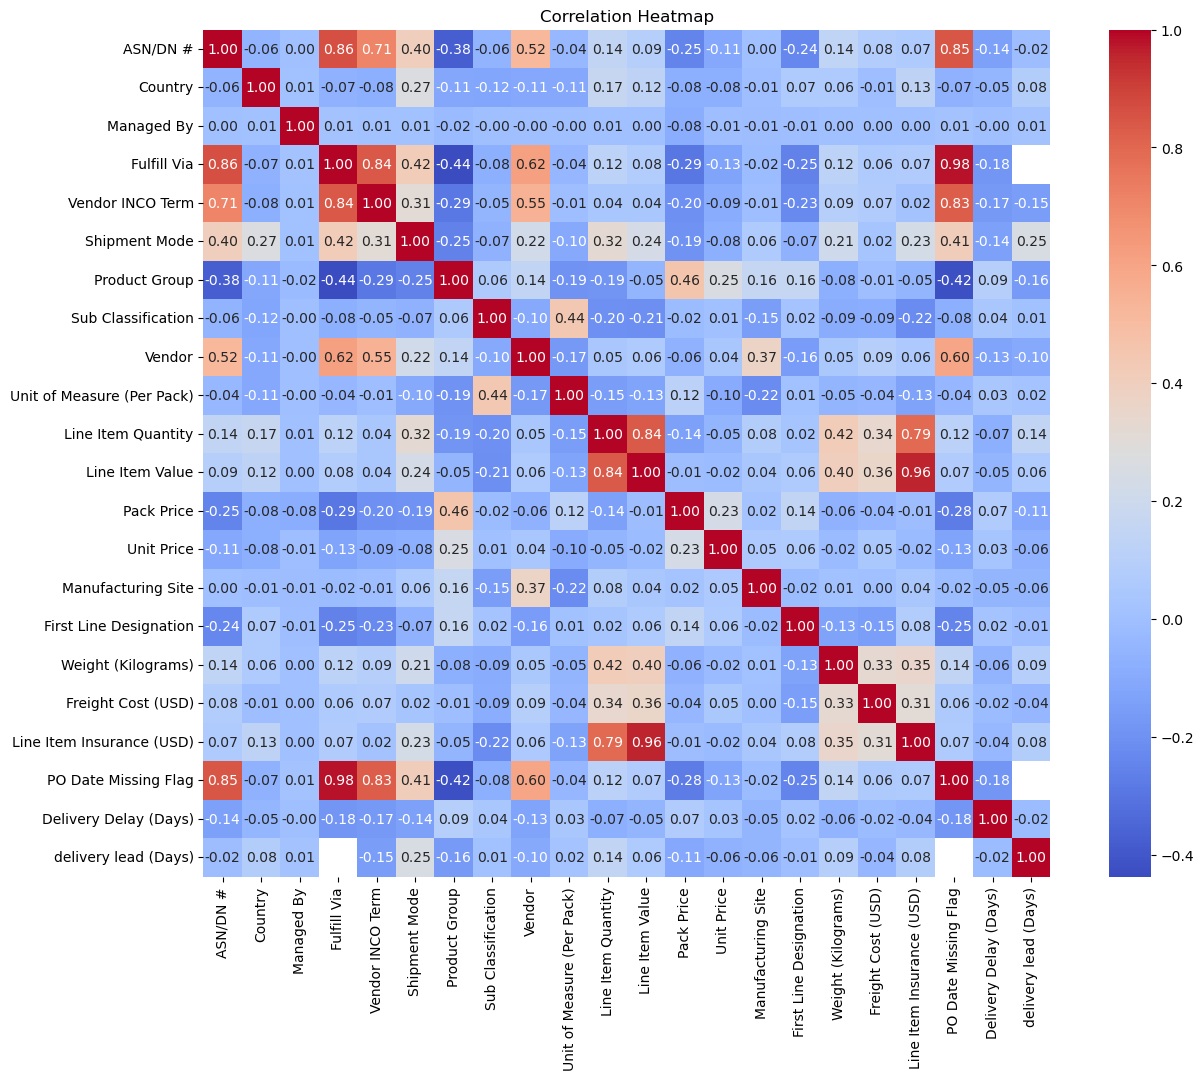

In [93]:
corr=df.corr()
plt.figure(figsize=(15, 11))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

#### Why is this graph ?

* To understand the correlation between different columns.

#### What are the insights from this graph?

* **Strong Positive Correlations :** 
    *   Line Item Quantity and Line Item Value have positive correlation (0.84) indicating price increased with increase in qunatity.
    * Weight (Kilograms) correlates highly with Freight cost (0.64) and Line Item value (0.42) which is expected as hevier items tend to cost more in freight.
    * ASN/DN# are highly correlated with Managed By (0.86) indicating these may be managed by similar systems.

* **Strong Negative Correlations :**
    * ASN/DN# and Fullfill Via have strong negative correlation (-0.86) implying mutually exclusive routes.
* **Minimal correlation with Delivery Metrics :**
    * Delivery Delay (Days) and delivery lead (Days) show very low correlation with most other features.



# Conclusion

Understanding the variables affecting delivery performance across various nations, suppliers, shipment methods, and product categories was the main goal of this exploratory data analysis (EDA) of the Fed-Ex dataset.  Finding supply chain bottlenecks and inefficiencies was the main business goal in order to improve delivery dependability and shorten lead times.

 The following are some important conclusions drawn from the visualizations:

 * **Impact of Shipment mmode :** While ocean shipments frequently resulted in lengthier lead times, especially in nations like Ethiopia, Malawi, and Pakistan, air charter emerged as the most dependable means of transportation with the fewest delays.

 * **Geographic Variance :** While South Africa and Congo often suffered delays, countries like Rwanda and Côte d'Ivoire reported early deliveries, underscoring the necessity for logistics techniques tailored to the unique region.

 * **Vendor Performance :** While some vendors, such as Aurobindo Pharma, experienced minor delays, most consistently delivered goods on time or early, indicating high vendor dependability overall.

 * **Analysis of INCO Terms :** RDC terms showed early deliveries, whereas DDP terms showed noticeably delayed deliveries.  This suggests that INCO terms must be carefully chosen depending on delivery expectations and have a major impact on delivery timelines.

 * **Product Subcategories :** Products including malaria test kits, pediatric formulations, and ACTs frequently delivered ahead of schedule, demonstrating effective supply chains for essential medical supplies.  HIV Kits, on the other hand, always came on schedule, with neither early nor late deviation, indicating standardized delivery dates.